In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
# import statements
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
#import missingno as msno
import warnings
import scipy.stats as stats
import missingno as msno
%matplotlib inline
warnings.filterwarnings("ignore")

from scipy.stats import f_oneway

import numpy as np
from sklearn.impute import KNNImputer
from scipy import stats

def load_data(filename):
    df = pd.read_csv(filename)
    return df


In [2]:
pd.set_option("display.max_columns",60)

In [3]:
df17 = pd.read_csv('Check_point17.csv')
df15 = pd.read_csv('Check_point15.csv')
df16 = pd.read_csv('Check_point16.csv')

# <font color='red'> 1) Univariet

In [4]:
df17

,OSE_ID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,GFA_Building,ENERGYSTARScore,Site_EUI_SF,SiteEnergy_Use_total,SteamUse,Electricity,Natural_Gas,Emissions_CO2e,Emissions_CO2e_FT,BuildingType,MAIN_BUILDING,Neighborhood
0,1.0,47.612190,-122.337997,94,1.0,12.0,88434.0,65.0,78.900000,6.977443e+06,2.023032e+06,3.686160e+06,1.272388e+06,249.135254,2.817189,NONRESIDENTIAL,HOTEL,DOWNTOWN
1,2.0,47.613106,-122.333358,25,1.0,11.0,88502.0,51.0,94.400000,8.354589e+06,2.378874e+06,3.905411e+06,4.448985e+06,262.267181,2.963404,NONRESIDENTIAL,HOTEL,DOWNTOWN
2,3.0,47.613349,-122.337699,52,1.0,41.0,861990.0,18.0,96.600000,8.326823e+07,1.966040e+07,4.976244e+07,3.709900e+06,2061.055792,2.391044,NONRESIDENTIAL,HOTEL,DOWNTOWN
3,5.0,47.614216,-122.336609,95,1.0,10.0,61320.0,1.0,460.400000,2.823173e+07,2.345852e+07,2.769023e+06,2.001894e+06,1936.532430,31.580764,NONRESIDENTIAL,HOTEL,DOWNTOWN
4,8.0,47.613754,-122.340924,41,1.0,18.0,51881.0,67.0,120.100000,6.230908e+06,1.835262e+06,6.066245e+06,8.763105e+06,505.248347,9.738601,NONRESIDENTIAL,HOTEL,DOWNTOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,50222.0,47.567220,-122.311540,31,1.0,1.0,12294.0,46.0,69.099998,8.495154e+05,5.809410e+05,5.242709e+05,3.254750e+05,20.849671,1.695922,NONRESIDENTIAL COS,OFFICE,GREATER DUWAMISH
1693,50223.0,47.596250,-122.322830,17,1.0,1.0,16000.0,55.0,59.400002,9.504000e+05,5.809410e+05,3.965461e+05,5.537300e+05,32.018235,2.001140,NONRESIDENTIAL COS,OTHER,DOWNTOWN
1694,50224.0,47.636440,-122.357840,47,1.0,1.0,13157.0,63.0,438.200012,5.765398e+06,1.896649e+06,1.792159e+06,3.973739e+06,222.428619,16.905725,NONRESIDENTIAL COS,OTHER,MAGNOLIA / QUEEN ANNE
1695,50225.0,47.528320,-122.324310,32,1.0,1.0,14101.0,66.0,51.000000,7.191510e+05,6.202537e+05,3.488702e+05,3.706010e+05,22.011042,1.560956,NONRESIDENTIAL COS,MIXED USE PROPERTY,GREATER DUWAMISH


In [5]:
cat_var=[ 'BuildingType', 'MAIN_BUILDING']

In [6]:
#This function allows you to view the distribution 
#of CO2 emissions within the classes of a variable.
def visualisation(variable,df):
    # the_mean=df["GHGEmissions(MetricTonsCO2e)"].mean()
    the_mean=df17["SiteEnergy_Use_total"].mean()
    fig=plt.figure(figsize=[18,7])
    fig.patch.set_facecolor('#E0E0E0')
    fig.patch.set_alpha(0.7)
    plt.title("C02 emissions distribution by {}".format(variable),size=16)
    sns.boxplot(x=variable, y="SiteEnergy_Use_total", data=df,color="#cbd1db",width=0.5,showfliers=False,showmeans=True)
    plt.hlines(y=the_mean,xmin=-0.5,xmax=len(df[variable].unique())-0.5,color="#6d788b",ls="--",label="Global mean")

    plt.ylabel(" C02 emissions",size=14)
    plt.xticks(range(0,len(df[variable].unique()))
               ,df[variable].unique(),rotation=90)
    plt.legend()
    plt.grid()
    plt.show()

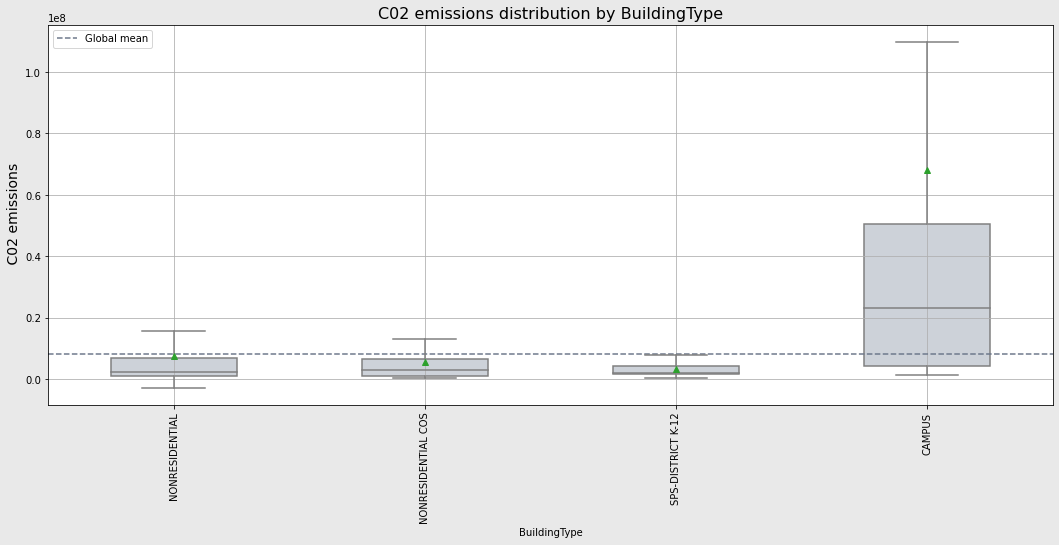

In [7]:
visualisation('BuildingType',df17)

In [8]:
MAIN_BUILDING=df17["MAIN_BUILDING"].unique()

In [9]:
df17["BuildingType"].unique()

array(['NONRESIDENTIAL', 'NONRESIDENTIAL COS', 'SPS-DISTRICT K-12',
       'CAMPUS'], dtype=object)

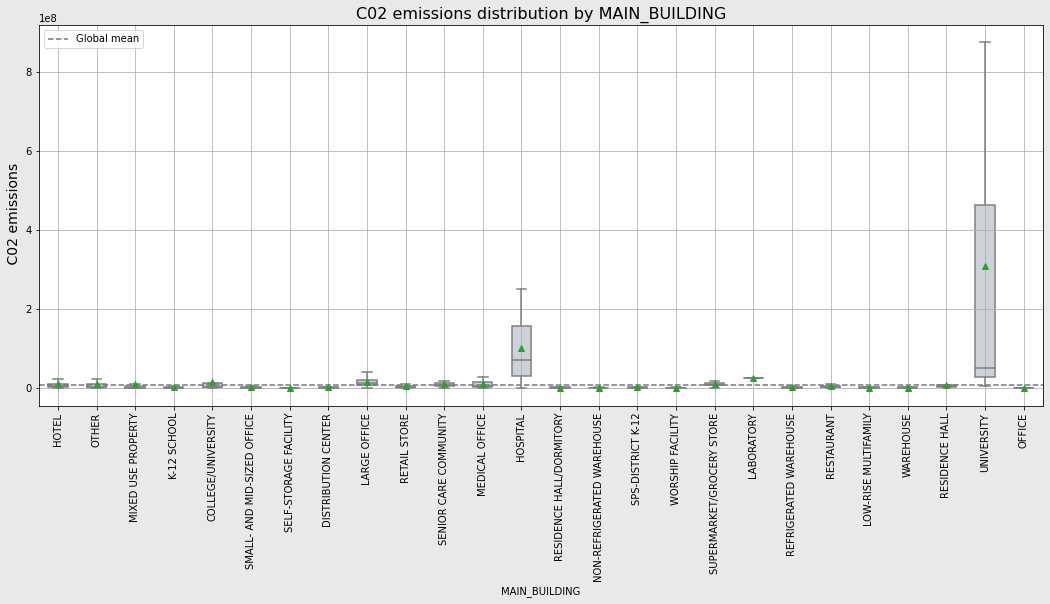

In [10]:
visualisation('MAIN_BUILDING',df17)

In [11]:
df17.head()

,OSE_ID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,GFA_Building,ENERGYSTARScore,Site_EUI_SF,SiteEnergy_Use_total,SteamUse,Electricity,Natural_Gas,Emissions_CO2e,Emissions_CO2e_FT,BuildingType,MAIN_BUILDING,Neighborhood
0,1.0,47.612190,-122.337997,94,1.0,12.0,88434.0,65.0,78.9,6977442.6,2023032.0,3686160.0,1272388.0,249.135254,2.817189,NONRESIDENTIAL,HOTEL,DOWNTOWN
1,2.0,47.613106,-122.333358,25,1.0,11.0,88502.0,51.0,94.4,8354588.8,2378874.0,3905411.0,4448985.0,262.267181,2.963404,NONRESIDENTIAL,HOTEL,DOWNTOWN
2,3.0,47.613349,-122.337699,52,1.0,41.0,861990.0,18.0,96.6,83268234.0,19660404.0,49762435.0,3709900.0,2061.055792,2.391044,NONRESIDENTIAL,HOTEL,DOWNTOWN
3,5.0,47.614216,-122.336609,95,1.0,10.0,61320.0,1.0,460.4,28231728.0,23458518.0,2769023.0,2001894.0,1936.532430,31.580764,NONRESIDENTIAL,HOTEL,DOWNTOWN
4,8.0,47.613754,-122.340924,41,1.0,18.0,51881.0,67.0,120.1,6230908.1,1835262.0,6066245.0,8763105.0,505.248347,9.738601,NONRESIDENTIAL,HOTEL,DOWNTOWN


In [12]:
#lr = LoinearRegression()
#dt = DecsisonTree()


# hyper coding taking long time
#run that
#
#create two different dataframe with stanad and withhyper
# 
#     say that this r 2 dfs with with hyper and with hyper 

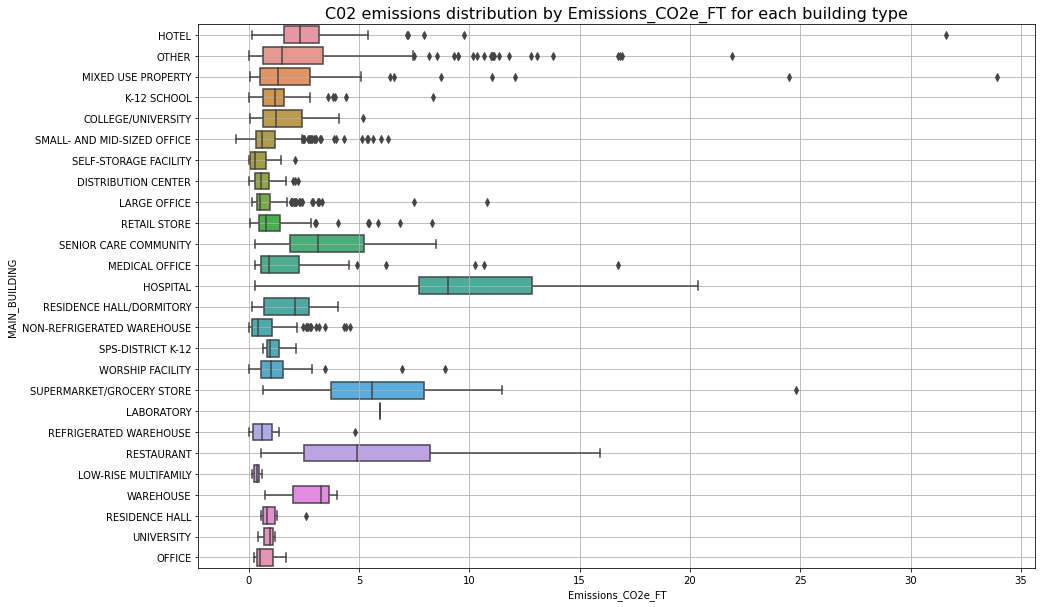

In [13]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'Emissions_CO2e_FT',data = df17, y ='MAIN_BUILDING')
#plt.xticks(rotation = 90)
plt.title("C02 emissions distribution by Emissions_CO2e_FT for each building type",size=16)
plt.grid()


#loerboundrt*1.5


plt.show()



Text(0.5, 1.0, 'Count of type of building on energy score')

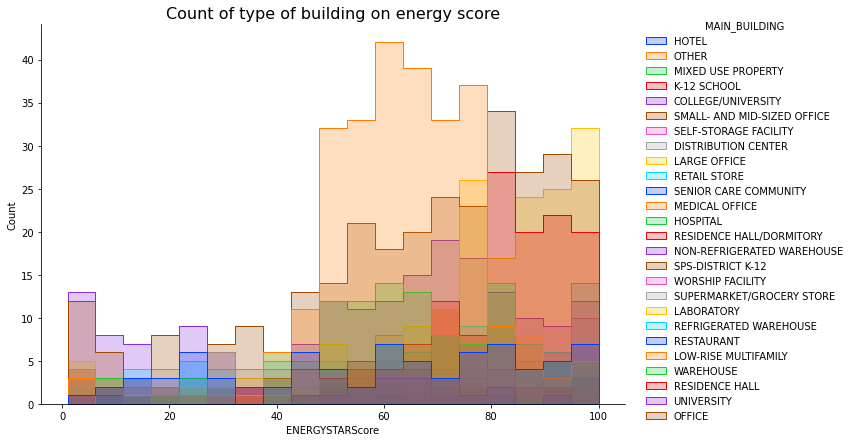

In [14]:
sns.displot(df17, x='ENERGYSTARScore', hue='MAIN_BUILDING', element="step", palette='bright', height=6, aspect=1.5)
plt.title("Count of type of building on energy score",size=16)

In [15]:
# need to insert back the Neighborhood

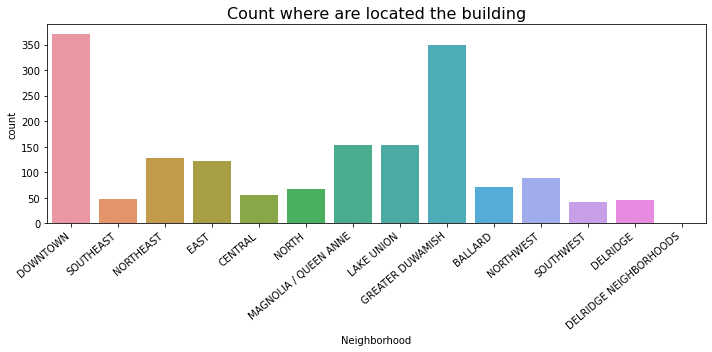

In [16]:
plt.figure(figsize=(10,5))
plt.title("Count where are located the building",size=16)
ax=sns.countplot(data=df17, x='Neighborhood')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.show()

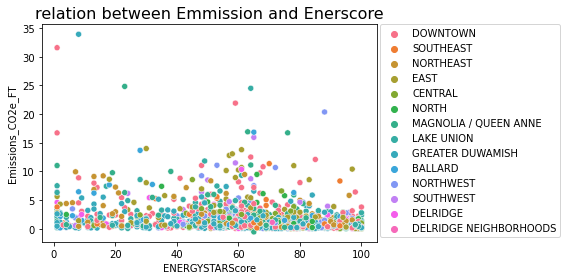

In [17]:

sns.scatterplot(x = 'ENERGYSTARScore', y = 'Emissions_CO2e_FT',data =df17, hue = 'Neighborhood' )#,hue="nutriscore_grade")
plt.title("relation between Emmission and Enerscore",size=16)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.show()


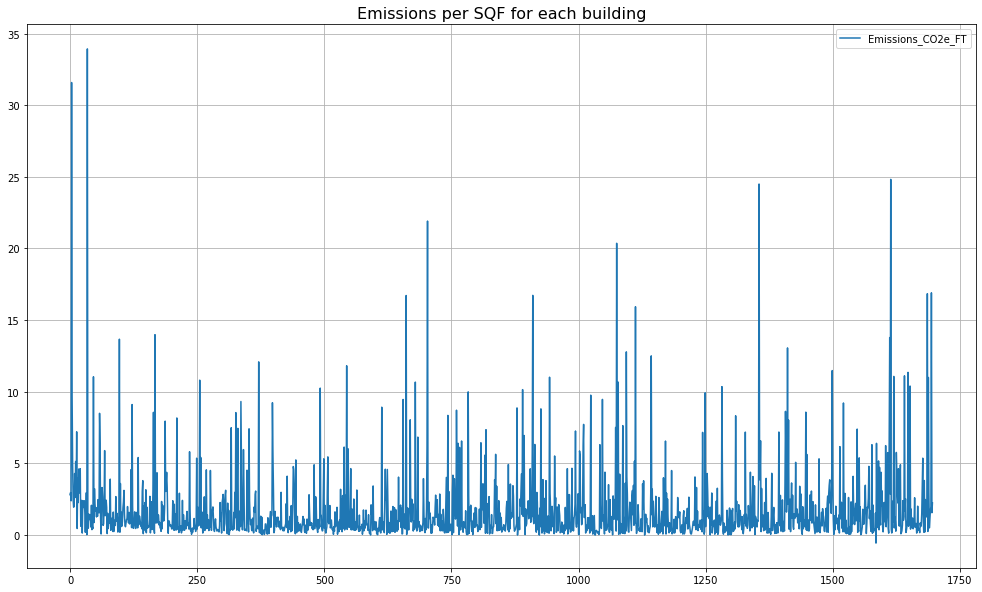

In [18]:
df17.plot( y=["Emissions_CO2e_FT"],figsize=(17,10), grid=True)
plt.title("Emissions per SQF for each building",size=16)
plt.show()

In [19]:
df15.loc[df17['Emissions_CO2e_FT'].idxmin()]

OSE_ID                                      29788.0
BuildingType                         NONRESIDENTIAL
MAIN_BUILDING           SMALL- AND MID-SIZED OFFICE
Neighborhood                  MAGNOLIA / QUEEN ANNE
Latitude                                   47.62495
Longitude                                -122.36036
YearBuilt                                        39
NumberofBuildings                               1.0
NumberofFloors                                  5.0
GFA_Building                                54015.0
ENERGYSTARScore                                75.0
Site_EUI_SF                               55.900002
SiteEnergy_Use_total                 3019438.582643
SteamUse                                        NaN
Electricity                               3020001.0
Natural_Gas                                     NaN
Emissions_CO2e                            21.051627
Emissions_CO2e_FT                          0.389737
Name: 1585, dtype: object

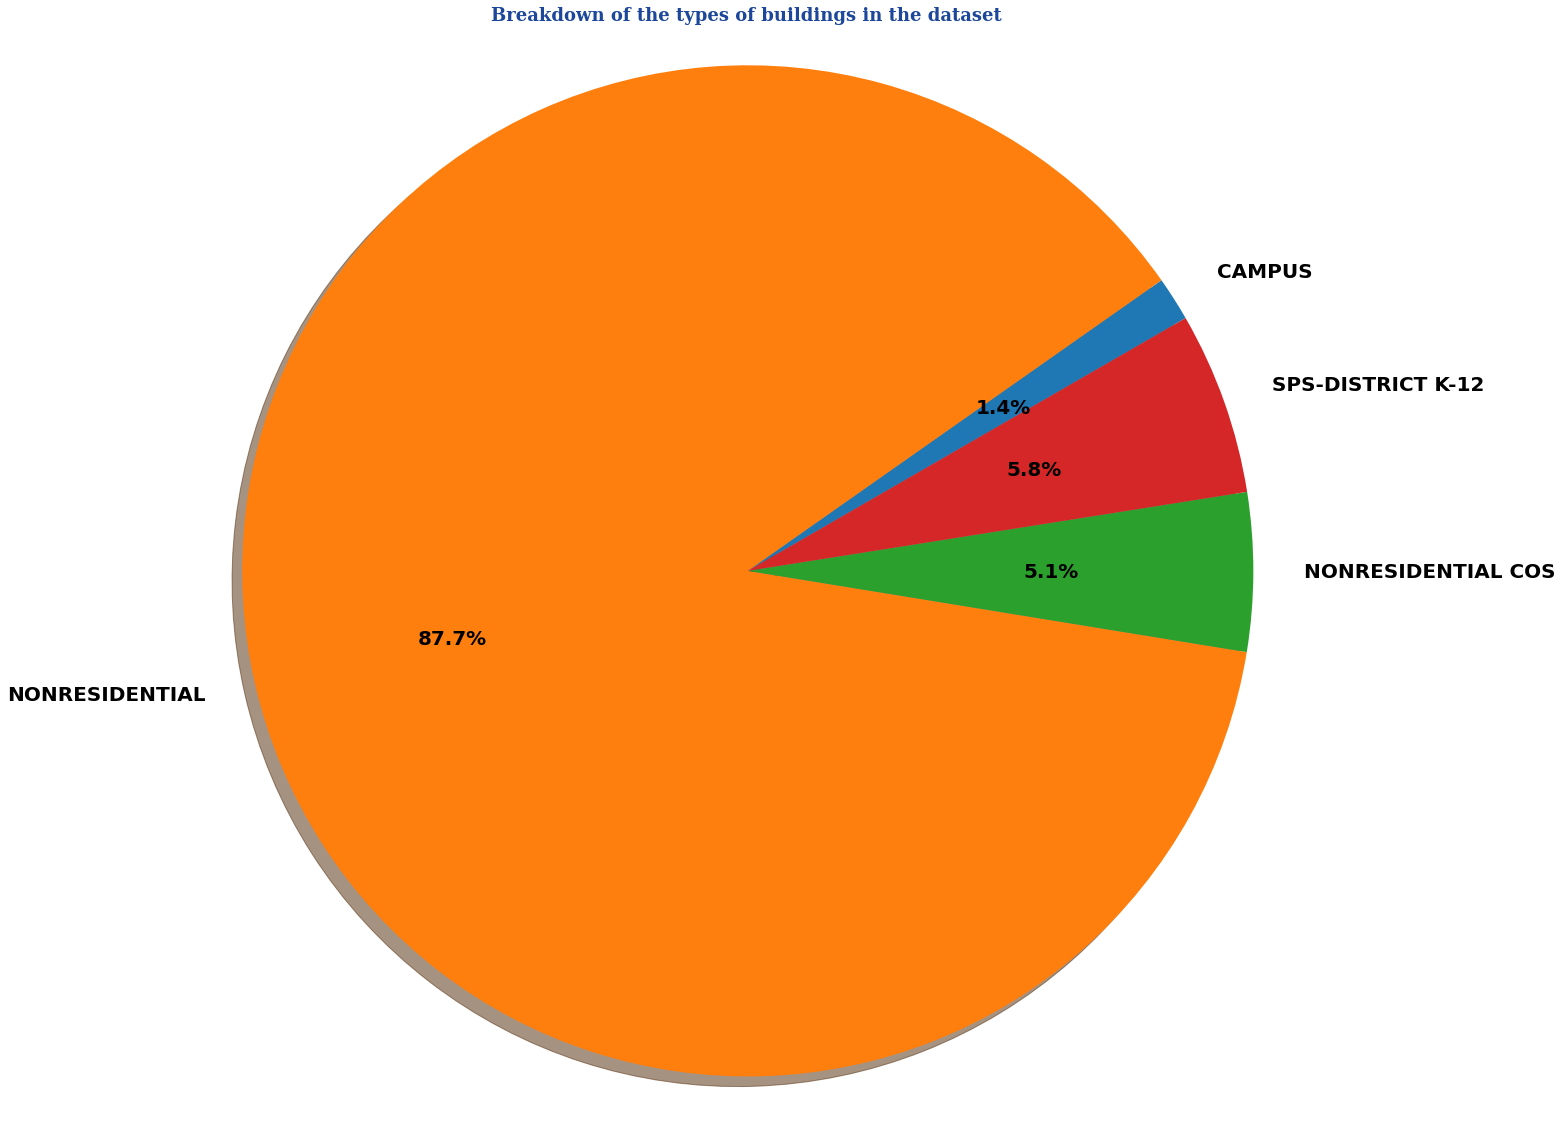

In [20]:


building_type = df17.groupby(by='BuildingType')['OSE_ID'].nunique()
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig, ax = plt.subplots(figsize=(20,20))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=20, weight="bold"))
ax.axis('equal')
ax.set_title("Breakdown of the types of buildings in the dataset", fontdict=font_title)
plt.show()



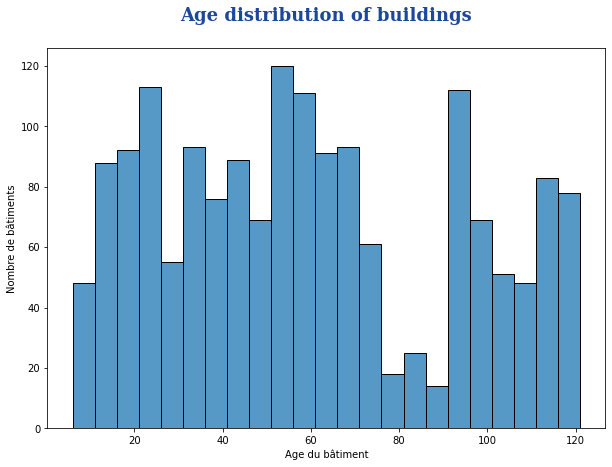

In [21]:
#df['BuildingAge'] = df['DataYear'] - df['YearBuilt']
# df.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(10,7))
ax = sns.histplot(data=df17, x='YearBuilt', bins=int((df17.YearBuilt.max() - df17.YearBuilt.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Age distribution of buildings\n", fontdict=font_title)
plt.show()

In [22]:
df17.head(1)

,OSE_ID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,GFA_Building,ENERGYSTARScore,Site_EUI_SF,SiteEnergy_Use_total,SteamUse,Electricity,Natural_Gas,Emissions_CO2e,Emissions_CO2e_FT,BuildingType,MAIN_BUILDING,Neighborhood
0,1.0,47.61219,-122.337997,94,1.0,12.0,88434.0,65.0,78.9,6977442.6,2023032.0,3686160.0,1272388.0,249.135254,2.817189,NONRESIDENTIAL,HOTEL,DOWNTOWN


# <font color='red'> 2) Distance

In [23]:
from math import radians, cos, sin, asin, sqrt

#Coordonnées du centre de Seattle
seattle_lat = 47.6062
seattle_lon = -122.3321

def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [24]:
#Calcul des distance au centre de Seattle pour chaque point
df17['harvesine_distance'] = [haversine_distance(seattle_lat, seattle_lon, x, y) 
                              for x, y in zip(df17.Latitude.astype(float), df17.Longitude.astype(float))]



Text(0.5, 0.98, 'Breakdown of CO2 emissions data according to geographic coordinates')

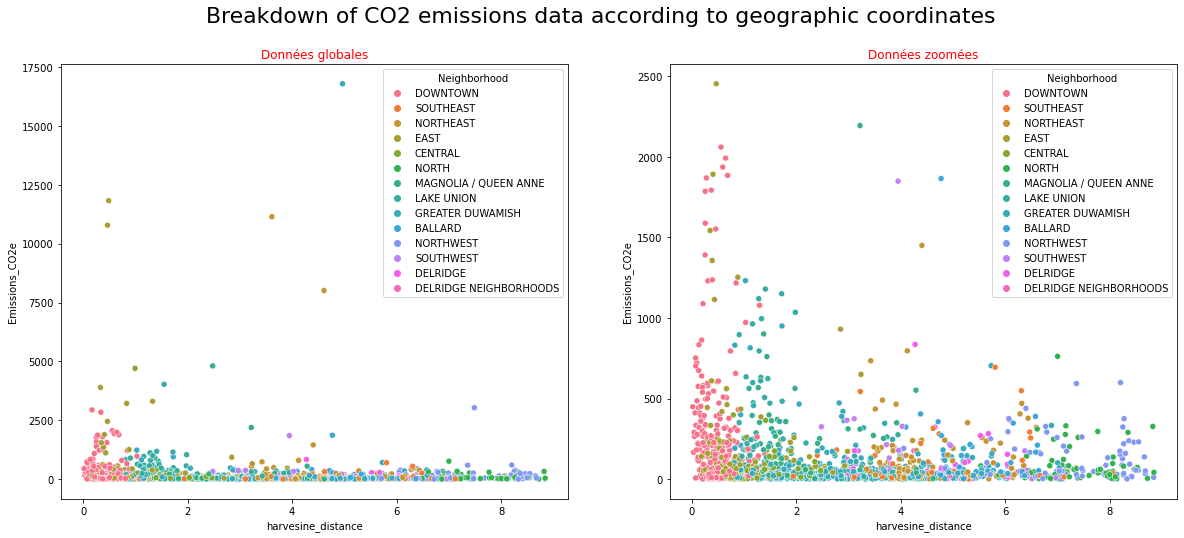

In [25]:
data=df17
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, y="Emissions_CO2e", x="harvesine_distance",  hue = 'Neighborhood', ax=axes[0])
axes[0].set_title("Données globales", color='Red')
sns.scatterplot(data=data[(data['Emissions_CO2e'] < 2500)], y="Emissions_CO2e", 
                x="harvesine_distance",  hue = 'Neighborhood', ax=axes[1])
axes[1].set_title("Données zoomées", color='Red')
plt.suptitle("Breakdown of CO2 emissions data according to geographic coordinates", fontsize=22)

In [26]:
# utiliser le LOG

In [27]:
df17

,OSE_ID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,GFA_Building,ENERGYSTARScore,Site_EUI_SF,SiteEnergy_Use_total,SteamUse,Electricity,Natural_Gas,Emissions_CO2e,Emissions_CO2e_FT,BuildingType,MAIN_BUILDING,Neighborhood,harvesine_distance
0,1.0,47.612190,-122.337997,94,1.0,12.0,88434.0,65.0,78.900000,6.977443e+06,2.023032e+06,3.686160e+06,1.272388e+06,249.135254,2.817189,NONRESIDENTIAL,HOTEL,DOWNTOWN,0.496412
1,2.0,47.613106,-122.333358,25,1.0,11.0,88502.0,51.0,94.400000,8.354589e+06,2.378874e+06,3.905411e+06,4.448985e+06,262.267181,2.963404,NONRESIDENTIAL,HOTEL,DOWNTOWN,0.480394
2,3.0,47.613349,-122.337699,52,1.0,41.0,861990.0,18.0,96.600000,8.326823e+07,1.966040e+07,4.976244e+07,3.709900e+06,2061.055792,2.391044,NONRESIDENTIAL,HOTEL,DOWNTOWN,0.558193
3,5.0,47.614216,-122.336609,95,1.0,10.0,61320.0,1.0,460.400000,2.823173e+07,2.345852e+07,2.769023e+06,2.001894e+06,1936.532430,31.580764,NONRESIDENTIAL,HOTEL,DOWNTOWN,0.591915
4,8.0,47.613754,-122.340924,41,1.0,18.0,51881.0,67.0,120.100000,6.230908e+06,1.835262e+06,6.066245e+06,8.763105e+06,505.248347,9.738601,NONRESIDENTIAL,HOTEL,DOWNTOWN,0.663901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,50222.0,47.567220,-122.311540,31,1.0,1.0,12294.0,46.0,69.099998,8.495154e+05,5.809410e+05,5.242709e+05,3.254750e+05,20.849671,1.695922,NONRESIDENTIAL COS,OFFICE,GREATER DUWAMISH,2.856620
1693,50223.0,47.596250,-122.322830,17,1.0,1.0,16000.0,55.0,59.400002,9.504000e+05,5.809410e+05,3.965461e+05,5.537300e+05,32.018235,2.001140,NONRESIDENTIAL COS,OTHER,DOWNTOWN,0.811312
1694,50224.0,47.636440,-122.357840,47,1.0,1.0,13157.0,63.0,438.200012,5.765398e+06,1.896649e+06,1.792159e+06,3.973739e+06,222.428619,16.905725,NONRESIDENTIAL COS,OTHER,MAGNOLIA / QUEEN ANNE,2.407156
1695,50225.0,47.528320,-122.324310,32,1.0,1.0,14101.0,66.0,51.000000,7.191510e+05,6.202537e+05,3.488702e+05,3.706010e+05,22.011042,1.560956,NONRESIDENTIAL COS,MIXED USE PROPERTY,GREATER DUWAMISH,5.389475


In [28]:
df17['Log_Emissions_CO2e'] = np.log(df17['Emissions_CO2e'].values)
df17['Log_Emissions_CO2e_FT'] = np.log(df17['Emissions_CO2e_FT'].values)
df17['Log_Site_EUI_SF'] = np.log(df17['Site_EUI_SF'].values)
#df17['Log_SiteEnergy_Use_total'] = np.log(df17['SiteEnergy_Use_total'].values)

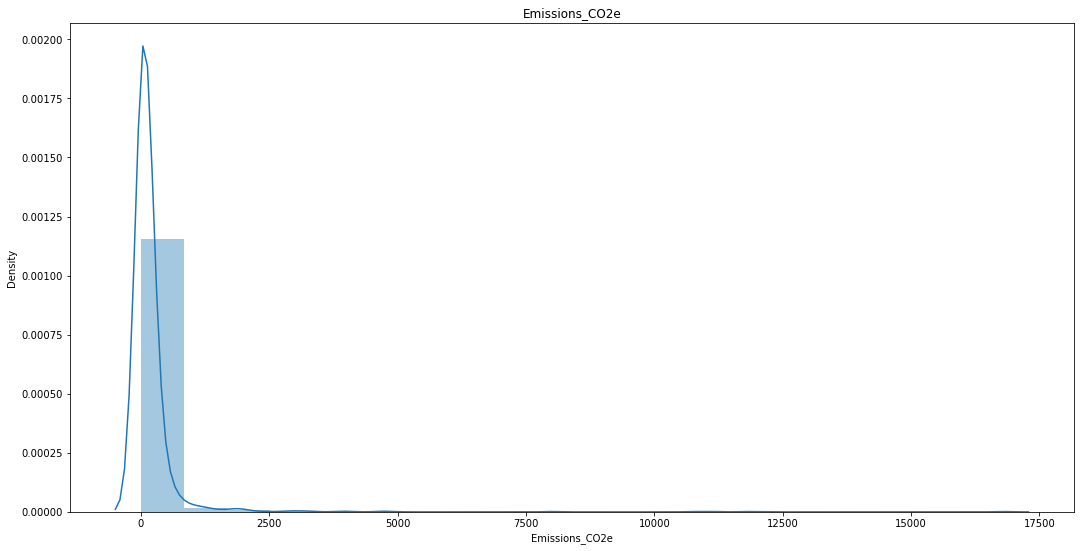

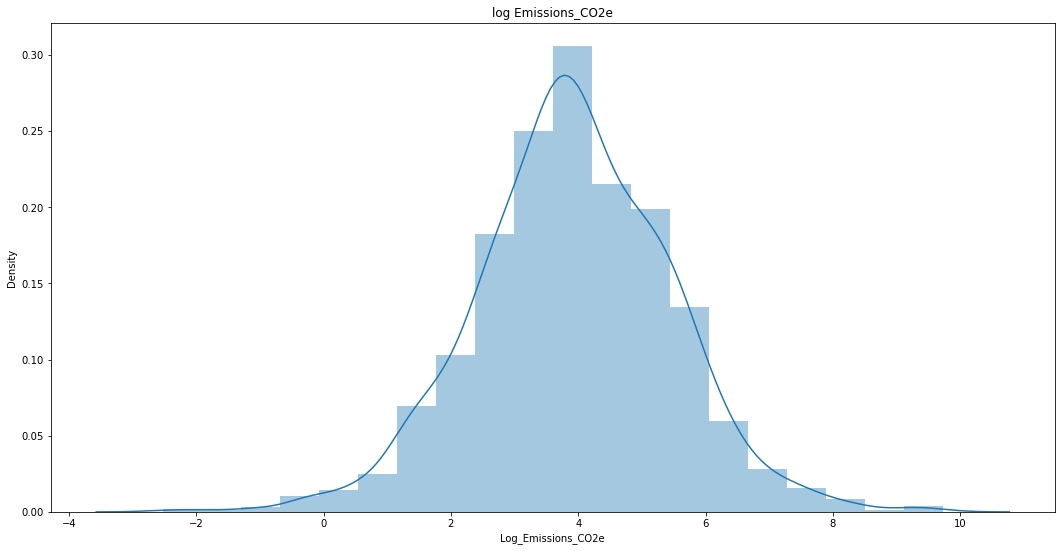

In [29]:
n_bins = 20
fig = plt.figure(figsize=(18,9))
#plt.hist(data['Emissions_CO2e'],n_bins)
sns.distplot(data['Emissions_CO2e'],bins = n_bins,kde = True)
plt.title('Emissions_CO2e')
plt.show()
fig = plt.figure(figsize=(18,9))
#plt.hist(np.log(data['Emissions_CO2e']),n_bins)
#sns.distplot(np.log(data['Emissions_CO2e']),bins = n_bins,kde = True)
sns.distplot(data['Log_Emissions_CO2e'],bins = n_bins,kde = True)
plt.title('log Emissions_CO2e')
plt.show()

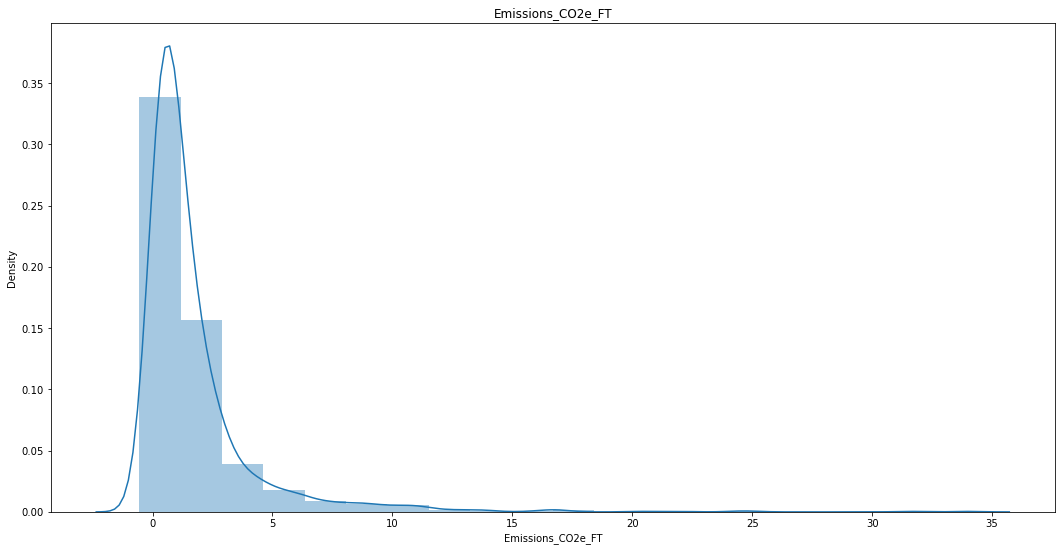

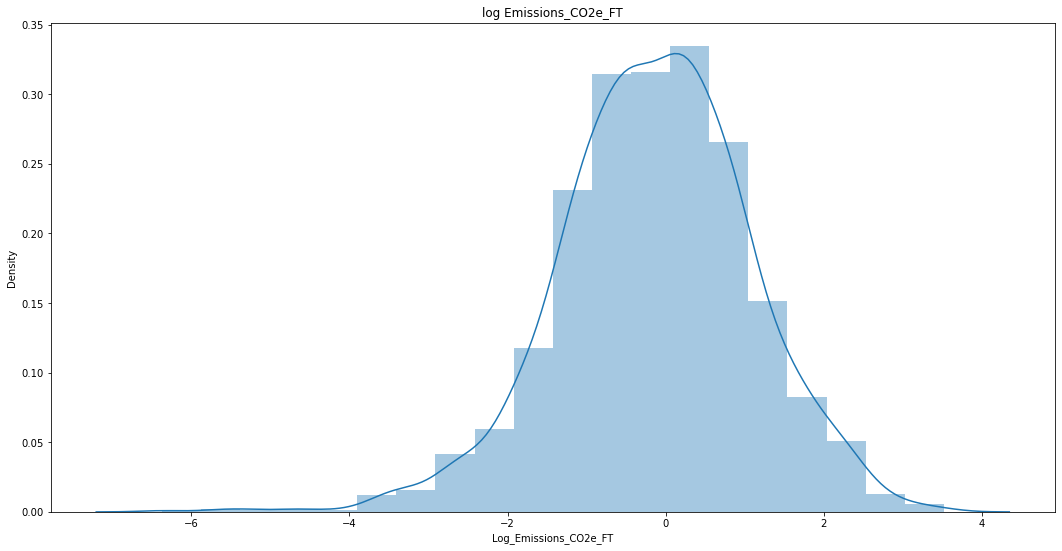

In [30]:
n_bins = 20
fig = plt.figure(figsize=(18,9))
#plt.hist(data['Emissions_CO2e_FT'],n_bins,kde = True)
sns.distplot(data['Emissions_CO2e_FT'],bins = n_bins,kde = True)
plt.title('Emissions_CO2e_FT')
plt.show()
fig = plt.figure(figsize=(18,9))
#plt.hist(np.log(data['Emissions_CO2e_FT']),n_bins)
#sns.distplot(np.log(data['Emissions_CO2e_FT']),bins = n_bins,kde = True)
sns.distplot(data['Log_Emissions_CO2e_FT'],bins = n_bins,kde = True)
plt.title('log Emissions_CO2e_FT')
plt.show()

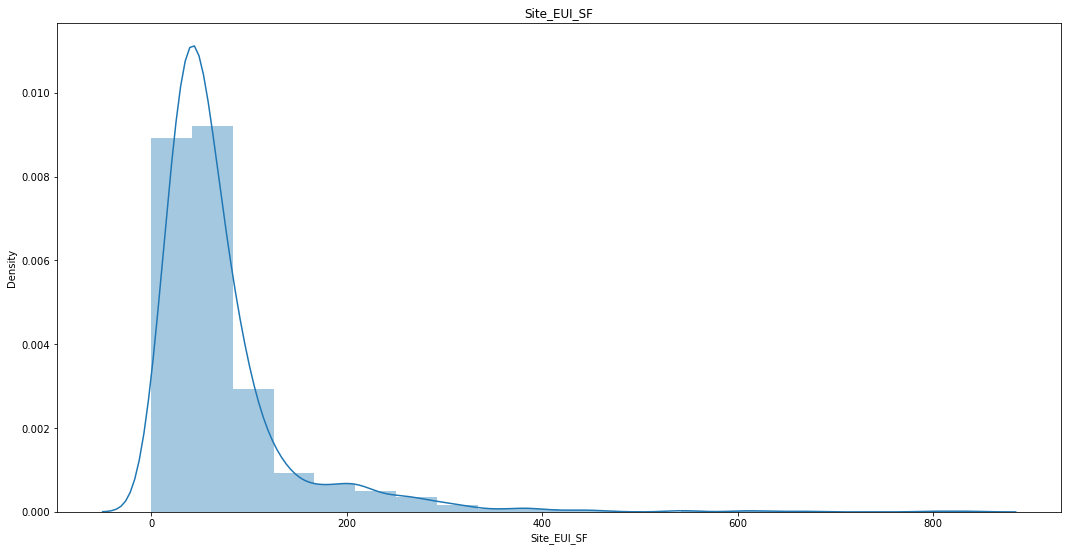

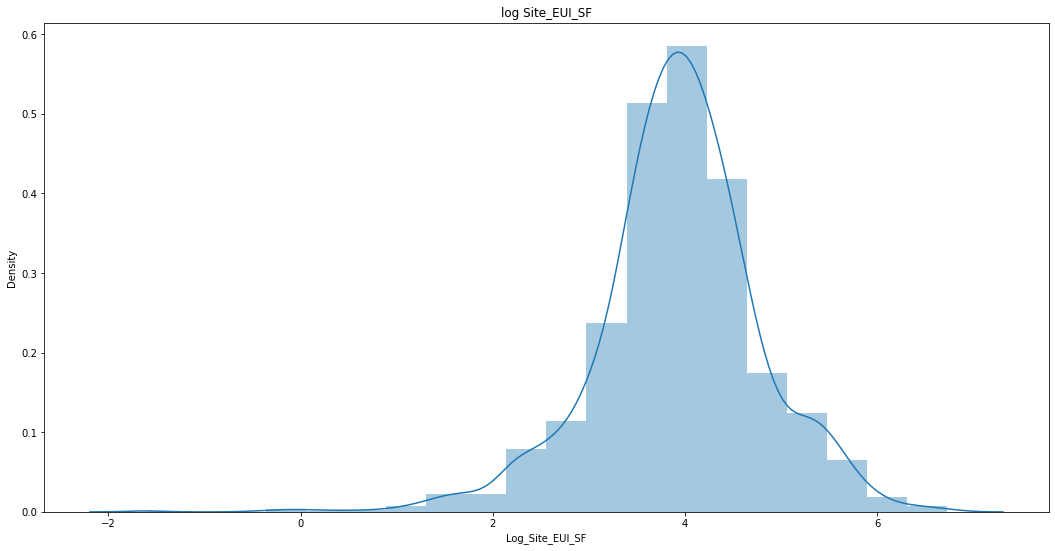

In [31]:
n_bins = 20
fig = plt.figure(figsize=(18,9))
#plt.hist(data['Emissions_CO2e_FT'],n_bins,kde = True)
sns.distplot(data['Site_EUI_SF'],bins = n_bins,kde = True)
plt.title('Site_EUI_SF')
plt.show()
fig = plt.figure(figsize=(18,9))
#plt.hist(np.log(data['Emissions_CO2e_FT']),n_bins)
#sns.distplot(np.log(data['Site_EUI_SF']),bins = n_bins,kde = True)
sns.distplot(data['Log_Site_EUI_SF'],bins = n_bins,kde = True)
plt.title('log Site_EUI_SF')
plt.show()

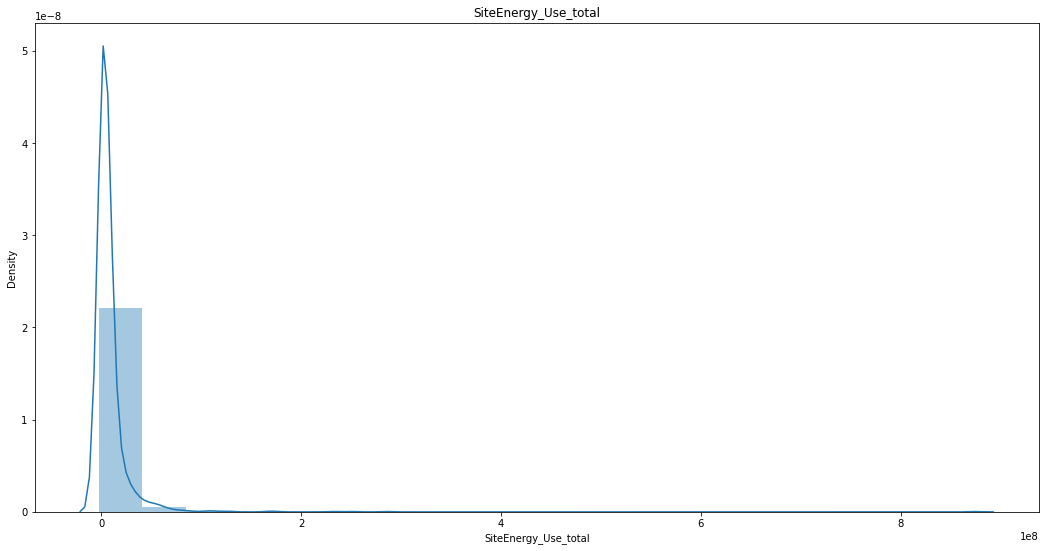

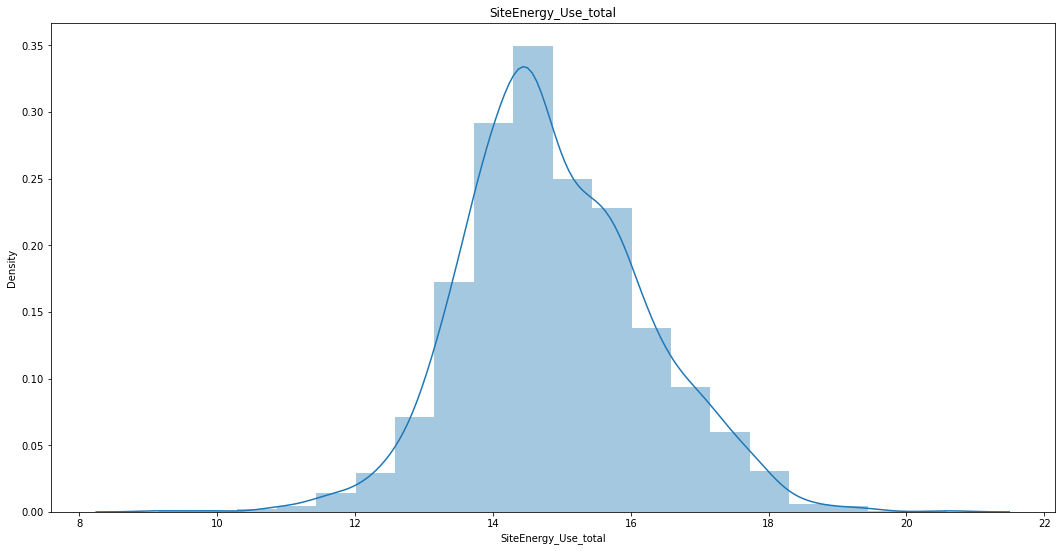

In [32]:
n_bins = 20
fig = plt.figure(figsize=(18,9))
#plt.hist(data['Emissions_CO2e_FT'],n_bins,kde = True)
sns.distplot(data['SiteEnergy_Use_total'],bins = n_bins,kde = True)
plt.title('SiteEnergy_Use_total')
plt.show()
fig = plt.figure(figsize=(18,9))
#plt.hist(np.log(data['Emissions_CO2e_FT']),n_bins)
sns.distplot(np.log(data['SiteEnergy_Use_total']),bins = n_bins,kde = True)
#sns.distplot(data['Log_SiteEnergy_Use_total'],bins = n_bins,kde = True)
plt.title('SiteEnergy_Use_total')
plt.show()

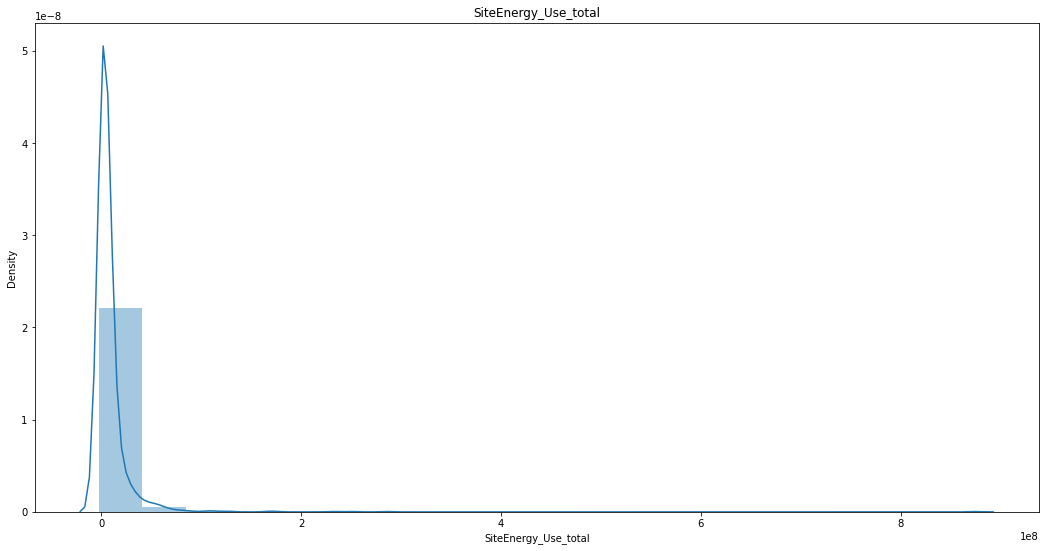

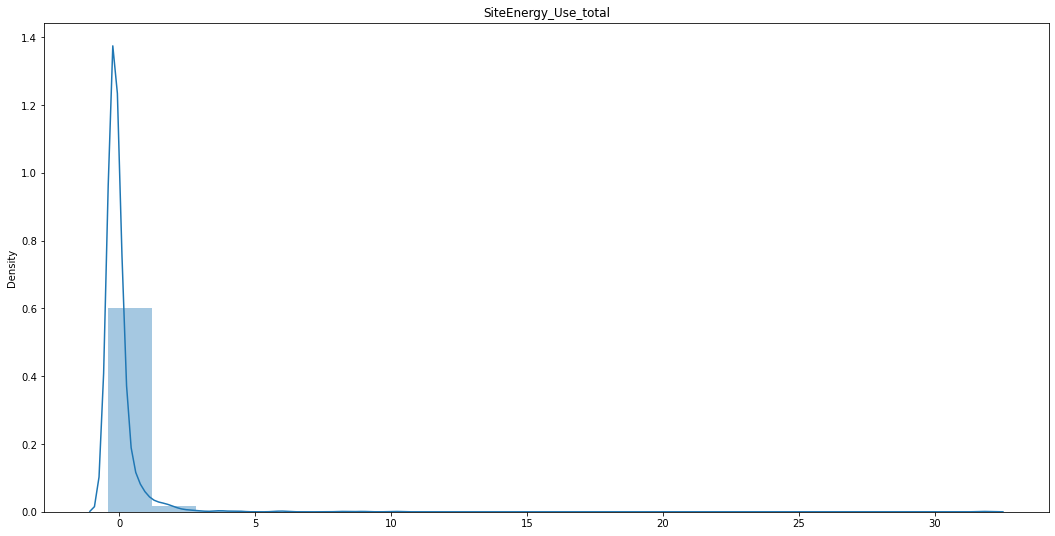

In [33]:
# standard scaler plots

n_bins = 20
fig = plt.figure(figsize=(18,9))
#plt.hist(data['Emissions_CO2e_FT'],n_bins,kde = True)
sns.distplot(data['SiteEnergy_Use_total'],bins = n_bins,kde = True)
plt.title('SiteEnergy_Use_total')
plt.show()
fig = plt.figure(figsize=(18,9))
#plt.hist(np.log(data['Emissions_CO2e_FT']),n_bins)
sns.distplot(StandardScaler().fit_transform(X = data['SiteEnergy_Use_total'].values.reshape(-1,1)),bins = n_bins,kde = True)
#sns.distplot(data['Log_SiteEnergy_Use_total'],bins = n_bins,kde = True)
plt.title('SiteEnergy_Use_total')
plt.show()

In [34]:
df17

,OSE_ID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,GFA_Building,ENERGYSTARScore,Site_EUI_SF,SiteEnergy_Use_total,SteamUse,Electricity,Natural_Gas,Emissions_CO2e,Emissions_CO2e_FT,BuildingType,MAIN_BUILDING,Neighborhood,harvesine_distance,Log_Emissions_CO2e,Log_Emissions_CO2e_FT,Log_Site_EUI_SF
0,1.0,47.612190,-122.337997,94,1.0,12.0,88434.0,65.0,78.900000,6.977443e+06,2.023032e+06,3.686160e+06,1.272388e+06,249.135254,2.817189,NONRESIDENTIAL,HOTEL,DOWNTOWN,0.496412,5.517996,1.035739,4.368181
1,2.0,47.613106,-122.333358,25,1.0,11.0,88502.0,51.0,94.400000,8.354589e+06,2.378874e+06,3.905411e+06,4.448985e+06,262.267181,2.963404,NONRESIDENTIAL,HOTEL,DOWNTOWN,0.480394,5.569364,1.086339,4.547541
2,3.0,47.613349,-122.337699,52,1.0,41.0,861990.0,18.0,96.600000,8.326823e+07,1.966040e+07,4.976244e+07,3.709900e+06,2061.055792,2.391044,NONRESIDENTIAL,HOTEL,DOWNTOWN,0.558193,7.630974,0.871730,4.570579
3,5.0,47.614216,-122.336609,95,1.0,10.0,61320.0,1.0,460.400000,2.823173e+07,2.345852e+07,2.769023e+06,2.001894e+06,1936.532430,31.580764,NONRESIDENTIAL,HOTEL,DOWNTOWN,0.591915,7.568654,3.452548,6.132096
4,8.0,47.613754,-122.340924,41,1.0,18.0,51881.0,67.0,120.100000,6.230908e+06,1.835262e+06,6.066245e+06,8.763105e+06,505.248347,9.738601,NONRESIDENTIAL,HOTEL,DOWNTOWN,0.663901,6.225050,2.276097,4.788325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,50222.0,47.567220,-122.311540,31,1.0,1.0,12294.0,46.0,69.099998,8.495154e+05,5.809410e+05,5.242709e+05,3.254750e+05,20.849671,1.695922,NONRESIDENTIAL COS,OFFICE,GREATER DUWAMISH,2.856620,3.037338,0.528227,4.235555
1693,50223.0,47.596250,-122.322830,17,1.0,1.0,16000.0,55.0,59.400002,9.504000e+05,5.809410e+05,3.965461e+05,5.537300e+05,32.018235,2.001140,NONRESIDENTIAL COS,OTHER,DOWNTOWN,0.811312,3.466306,0.693717,4.084294
1694,50224.0,47.636440,-122.357840,47,1.0,1.0,13157.0,63.0,438.200012,5.765398e+06,1.896649e+06,1.792159e+06,3.973739e+06,222.428619,16.905725,NONRESIDENTIAL COS,OTHER,MAGNOLIA / QUEEN ANNE,2.407156,5.404606,2.827652,6.082675
1695,50225.0,47.528320,-122.324310,32,1.0,1.0,14101.0,66.0,51.000000,7.191510e+05,6.202537e+05,3.488702e+05,3.706010e+05,22.011042,1.560956,NONRESIDENTIAL COS,MIXED USE PROPERTY,GREATER DUWAMISH,5.389475,3.091544,0.445299,3.931826


In [35]:
df17.isnull().sum()

OSE_ID                   0
Latitude                 0
Longitude                0
YearBuilt                0
NumberofBuildings        0
NumberofFloors           0
GFA_Building             0
ENERGYSTARScore          0
Site_EUI_SF              0
SiteEnergy_Use_total     0
SteamUse                 0
Electricity              0
Natural_Gas              0
Emissions_CO2e           0
Emissions_CO2e_FT        0
BuildingType             0
MAIN_BUILDING            0
Neighborhood             0
harvesine_distance       0
Log_Emissions_CO2e       0
Log_Emissions_CO2e_FT    1
Log_Site_EUI_SF          0
dtype: int64

In [36]:
# removing that null values from df17
df17 = df17.dropna()

# <font color='red'> 3) open classeroom  bi varie

In [37]:
data= df17.drop(["MAIN_BUILDING","BuildingType","Neighborhood"], axis=1)
X = data[data.columns[:-1]].values #[:-1] c'est quoi
y = data['ENERGYSTARScore'].values

In [38]:
y_class = np.where(y<6, 0, 1)

In [39]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
	model_selection.train_test_split(X, y_class,
                                	test_size=0.3 # 30% des données dans le jeu de test
                                	)

In [40]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

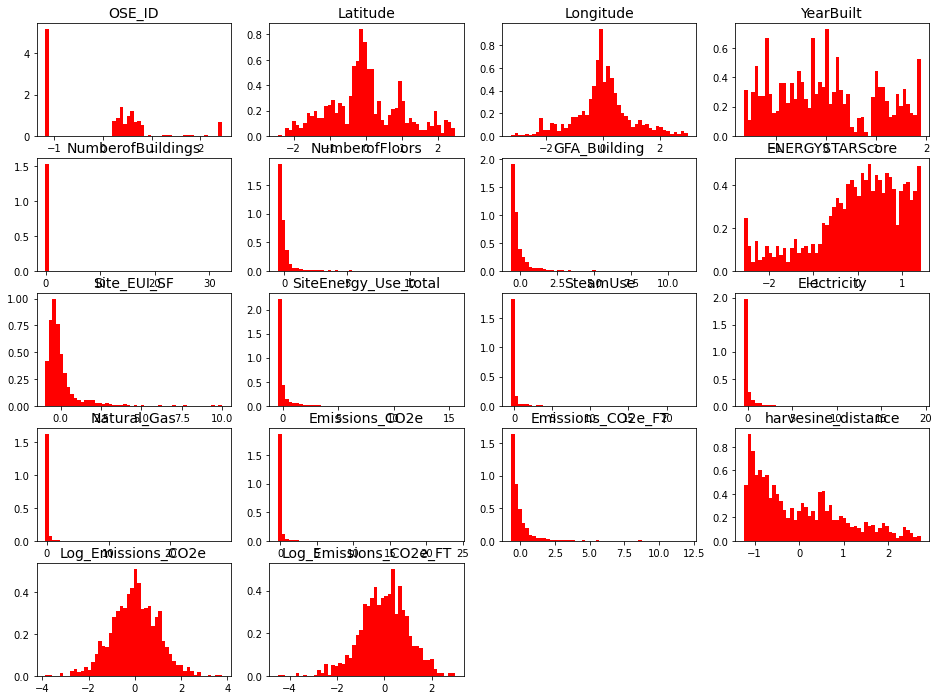

In [41]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X_train_std.shape[1]):
    ax = fig.add_subplot(5,4, (feat_idx+1))
    h = ax.hist(X_train_std[:, feat_idx], bins=50, color = 'Red', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)


# <font color='red'> 3.1) open classeroom  bi varie Analyse des variables à prédire

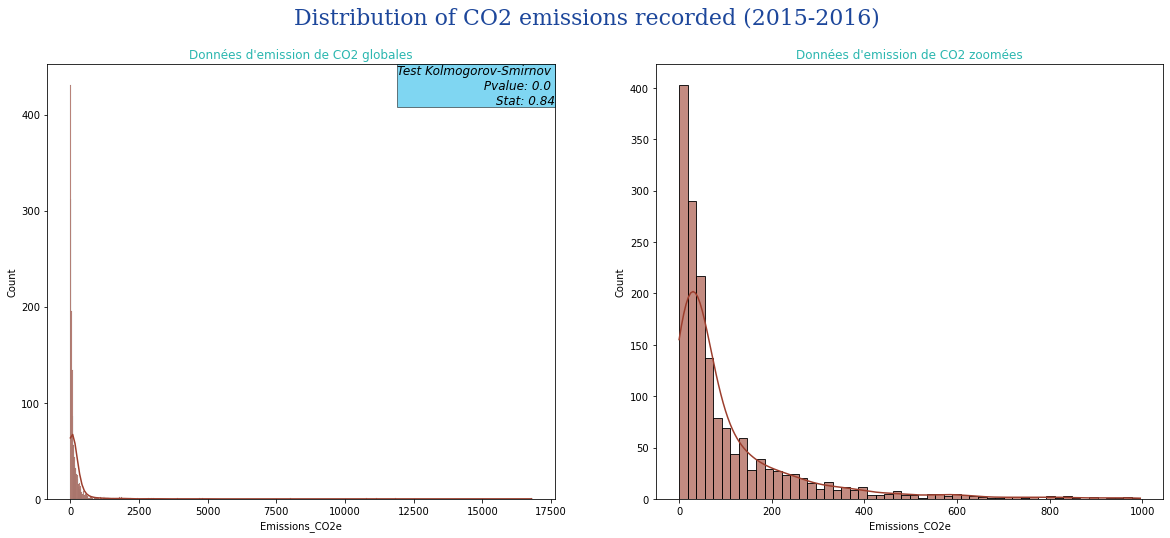

In [47]:
data=df17
import scipy.stats as stats

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

sns.histplot(data=data, x="Emissions_CO2e", kde=True, ax=axes[0], color="#9C3E2D", alpha=0.6)
axes[0].set_title("Données d'emission de CO2 globales", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(data['Emissions_CO2e'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=data[(data['Emissions_CO2e']< 1000)], x="Emissions_CO2e", kde=True, ax=axes[1], color="#9C3E2D", alpha=0.6)
axes[1].set_title("Données d'emission de CO2 zoomées", color='#2cb7b0')

plt.suptitle("Distribution of CO2 emissions recorded (2015-2016)", 
             fontdict=font_title, fontsize=22)
plt.show()

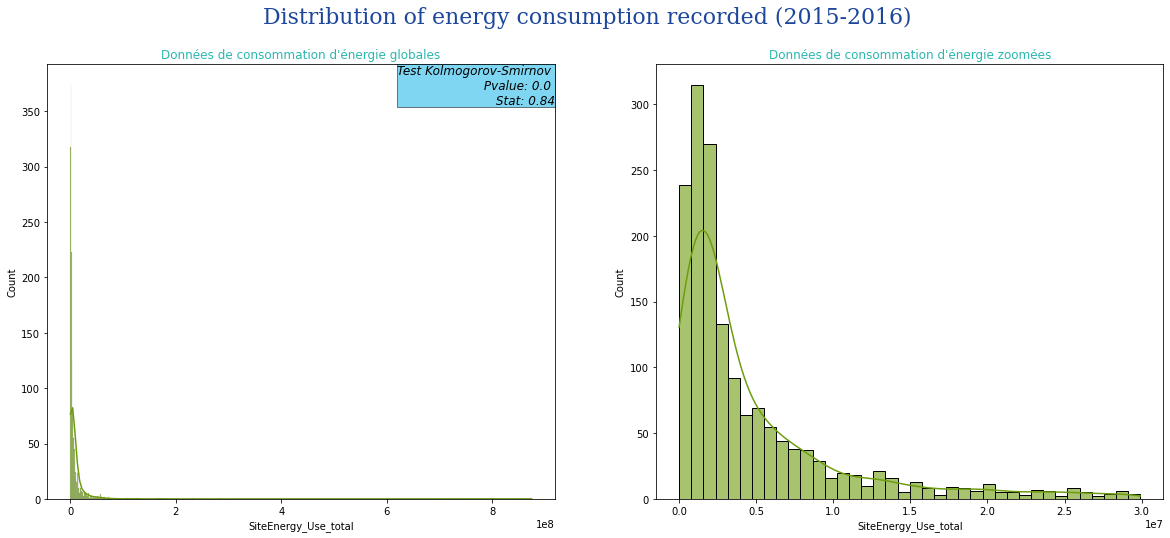

In [48]:
data=df17


fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))

sns.histplot(data=data, x="SiteEnergy_Use_total", kde=True, ax=axes[0], color="#6D9C0E", alpha=0.6)
axes[0].set_title("Données de consommation d'énergie globales", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(data['SiteEnergy_Use_total'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=data[(data['SiteEnergy_Use_total']< 0.3*10**8)], x="SiteEnergy_Use_total", kde=True, ax=axes[1], color="#6D9C0E", alpha=0.6)
axes[1].set_title("Données de consommation d'énergie zoomées", color='#2cb7b0')

plt.suptitle("Distribution of energy consumption recorded (2015-2016)", fontdict=font_title, fontsize=22)
plt.show()



In [49]:
df17.drop(["Emissions_CO2e","Emissions_CO2e_FT",'Site_EUI_SF'], axis=1, inplace=True)
df16.drop(["Emissions_CO2e","Emissions_CO2e_FT",'Site_EUI_SF'], axis=1, inplace=True)
df15.drop(["Emissions_CO2e","Emissions_CO2e_FT",'Site_EUI_SF'], axis=1, inplace=True)

En se basant sur les projections obtenus et les résultats des tests de Kolmogorov-Smirnov (Pvalue < au niveau de test de 5%) on rejette donc l'hypothèse de normalité des distributions de ces variables.

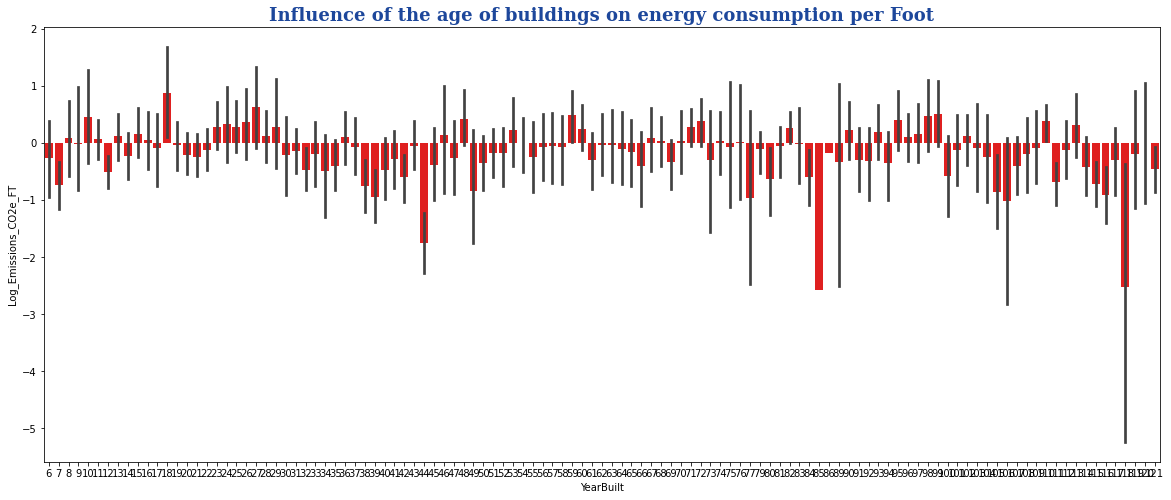

In [50]:
data=df17
fig, axes = plt.subplots( figsize=(20,8))
sns.barplot(data=data,x=data['YearBuilt'], y="Log_Emissions_CO2e_FT", color = "red" )
plt.title("Influence of the age of buildings on energy consumption per Foot", fontdict=font_title)

plt.show()



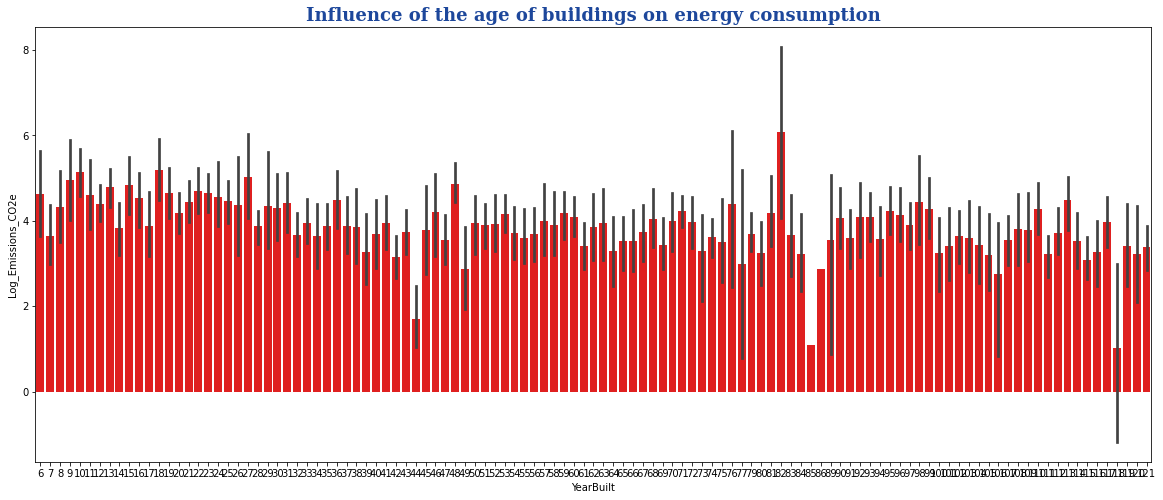

In [51]:
data=df17
fig, axes = plt.subplots( figsize=(20,8))
sns.barplot(data=data,x=data['YearBuilt'], y="Log_Emissions_CO2e", color = "red" )
plt.title("Influence of the age of buildings on energy consumption", fontdict=font_title)

plt.show()



# <font color='red'> 4) Data leackage

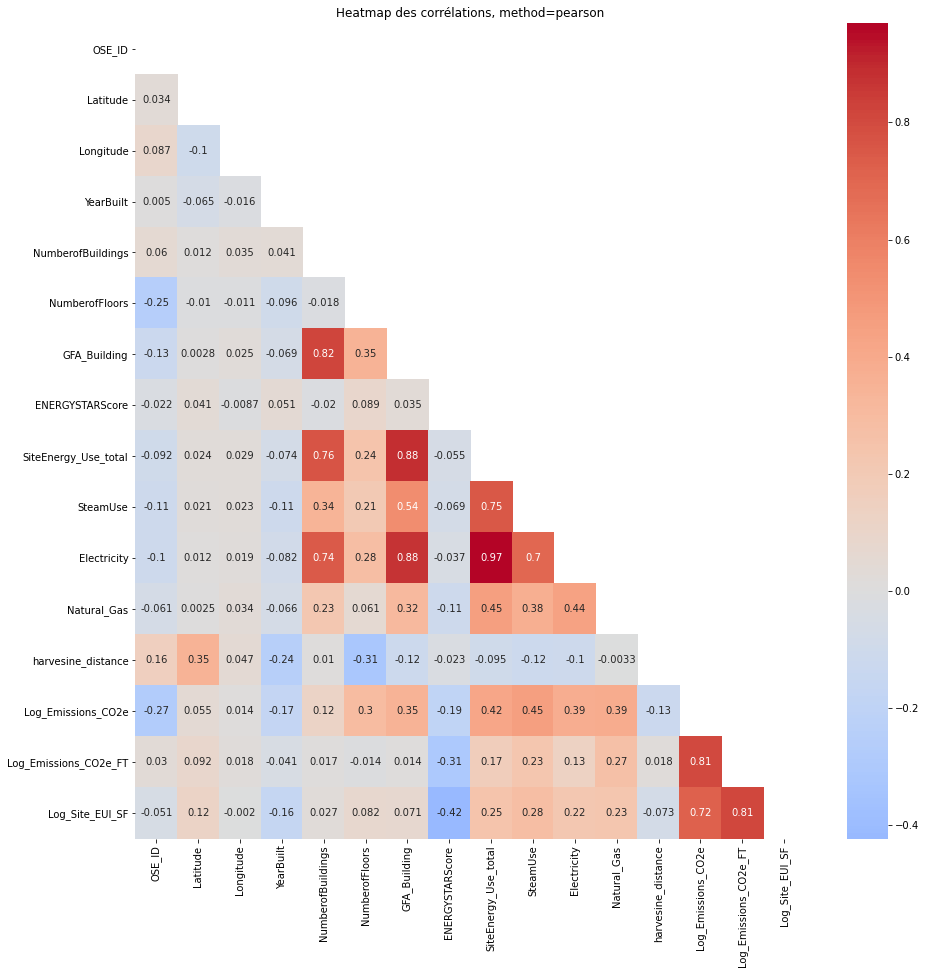

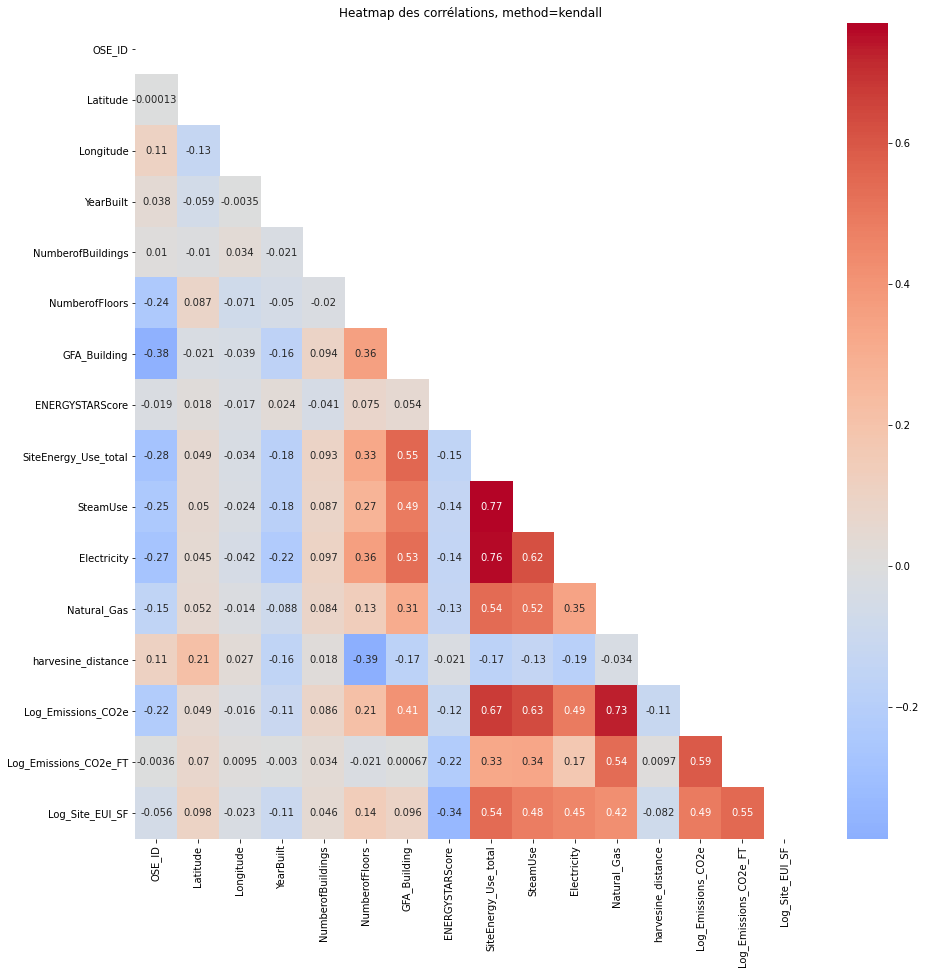

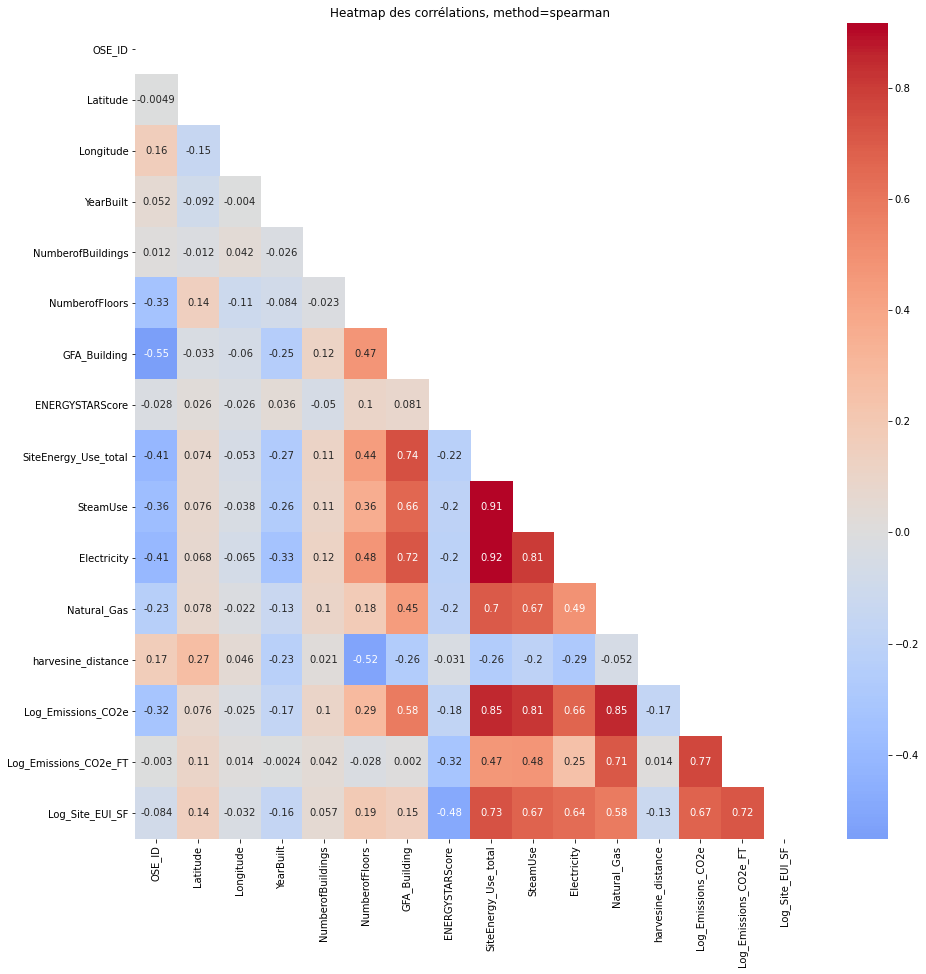

In [52]:
corr_methods=  ['pearson','kendall', 'spearman']

'''
pearson : standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman :  Spearman rank correlation
'''

for corr_method in corr_methods:
    corr = df17.corr(method=corr_method)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15,15))
    ax = sns.heatmap(corr, annot=True, mask=mask, center=0, cmap="coolwarm")
    plt.title('Heatmap des corrélations, method={}'.format(corr_method))
    plt.savefig('correlation.png')
    plt.show()
 

In [53]:
df17.drop(['SteamUse','Electricity','Natural_Gas'], axis=1, inplace=True)
df16.drop(['SteamUse','Electricity','Natural_Gas'], axis=1, inplace=True)
df15.drop(['SteamUse','Electricity','Natural_Gas'], axis=1, inplace=True)

In [54]:
#pd.DataFrame(Sclaer.fit_transform(df['col'].reshape(-1,1)),coluumns = data_clumns)



In [55]:
# shows on methode spearman that the correlation beetween Energy usage and 'SteamUse', 'Electricity', 'Natural_Gas' is very high.
# that is why we need to remove them

In [56]:
data=df17
corr = data.corr(method ='spearman')
corr_columns = corr.columns[((corr < 1) & (corr > 0.7)).any(axis=0)]
display(corr_columns)

Index(['GFA_Building', 'SiteEnergy_Use_total', 'Log_Emissions_CO2e',
       'Log_Emissions_CO2e_FT', 'Log_Site_EUI_SF'],
      dtype='object')

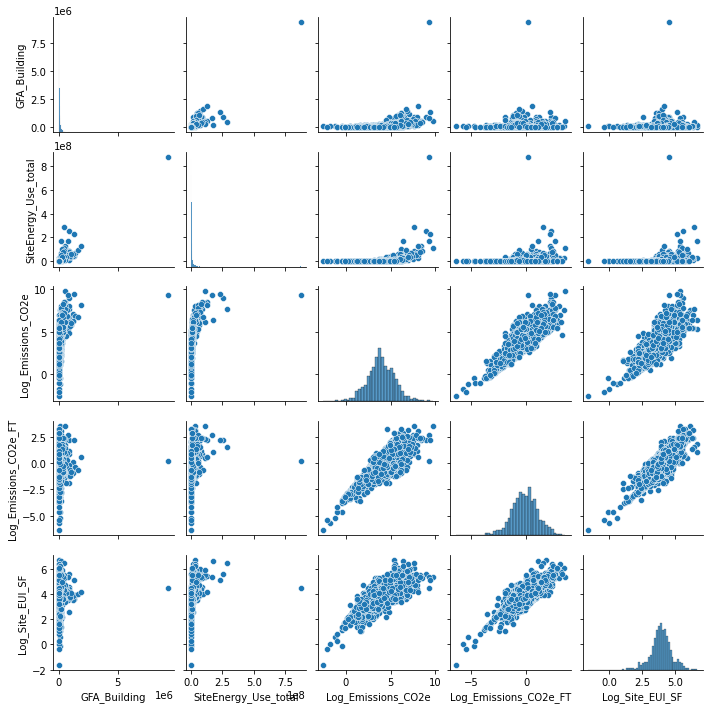

In [57]:
sns.pairplot(data[corr_columns], height = 2)

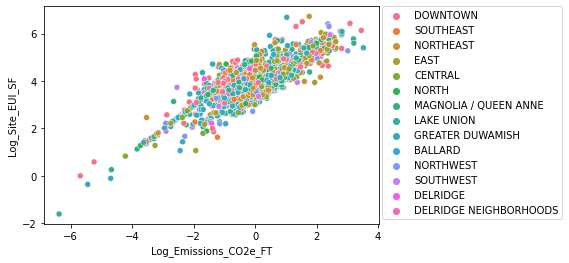

In [58]:
#bimodal

sns.scatterplot(x = 'Log_Emissions_CO2e_FT', y = 'Log_Site_EUI_SF',data =df17,hue="Neighborhood")
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.show()

In [59]:
# we removed 'SteamUse','Electricity','Natural_Gas' because they give the answer directly to the model

<function matplotlib.pyplot.xlim(*args, **kwargs)>

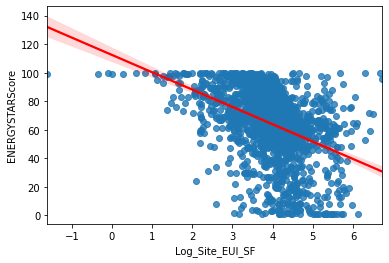

In [60]:
sns.regplot(y='ENERGYSTARScore' ,x='Log_Site_EUI_SF',  data=df17, line_kws={'color':'red'})
plt.xlim

(0.0, 20.0)

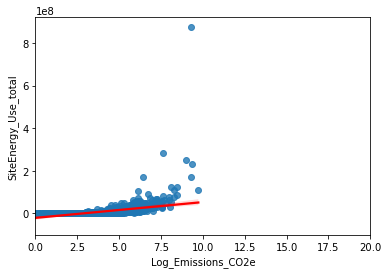

In [61]:
sns.regplot(y='SiteEnergy_Use_total' ,x='Log_Emissions_CO2e',  data=df17, line_kws={'color':'red'})
plt.xlim(0, 20)

<function matplotlib.pyplot.xlim(*args, **kwargs)>

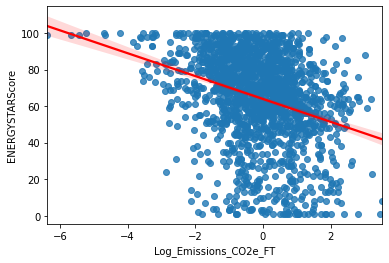

In [62]:
sns.regplot(y='ENERGYSTARScore' ,x='Log_Emissions_CO2e_FT',  data=df17, line_kws={'color':'red'})
plt.xlim

<function matplotlib.pyplot.xlim(*args, **kwargs)>

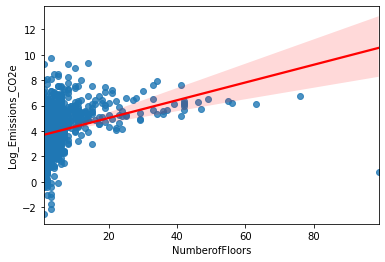

In [63]:
sns.regplot(y='Log_Emissions_CO2e' ,x='NumberofFloors',  data=df17, line_kws={'color':'red'})
plt.xlim

# 2. ONE HOT ENCODER .


In [64]:
#!pip install category_encoders

In [65]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop ='first')
ohe.fit(df17["MAIN_BUILDING"].values.reshape(-1,1))

OneHotEncoder(drop='first')

In [66]:
#ohe.transform(df17["MAIN_BUILDING"].values.reshape(-1,1)).to_array()

In [67]:
import category_encoders as ce

In [68]:
encoder= ce.OneHotEncoder(cols="MAIN_BUILDING", use_cat_names= True)

In [69]:
df17_encoded= encoder.fit_transform(df17)

In [70]:
encoder= ce.OneHotEncoder(cols="BuildingType", use_cat_names= True)

In [71]:
df17_encoded= encoder.fit_transform(df17_encoded)

In [72]:
encoder= ce.OneHotEncoder(cols="Neighborhood", use_cat_names= True)

In [73]:
df17_encoded= encoder.fit_transform(df17_encoded)

In [74]:
df17_encoded.shape

(1696, 57)

In [75]:
df17_encoded.to_csv('Check_point18.csv',index = False)

In [76]:
df18=df17_encoded

# <font color='red'> Find the perfect model to follow

In [77]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import *
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import  make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import *
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Sandart Scaler

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y=df18["Log_Emissions_CO2e"]
X=df18.drop(columns=['Log_Emissions_CO2e', 'OSE_ID',"Log_Emissions_CO2e_FT","Log_Site_EUI_SF"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [153]:
def plots (df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title("Before"+ str(t).split("(")[0])
    
    plt.subplot(122)
    p1 =t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title("after"+ str(t).split("(")[0])
    

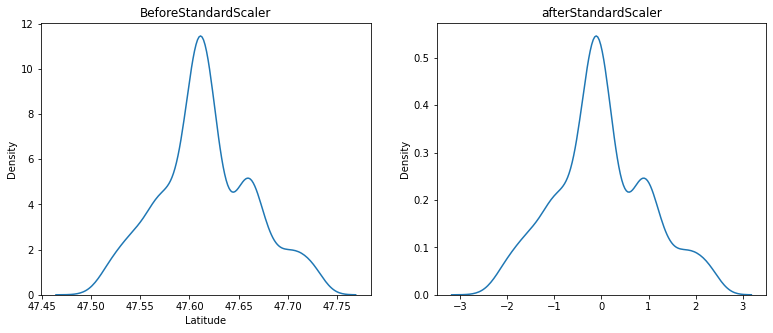

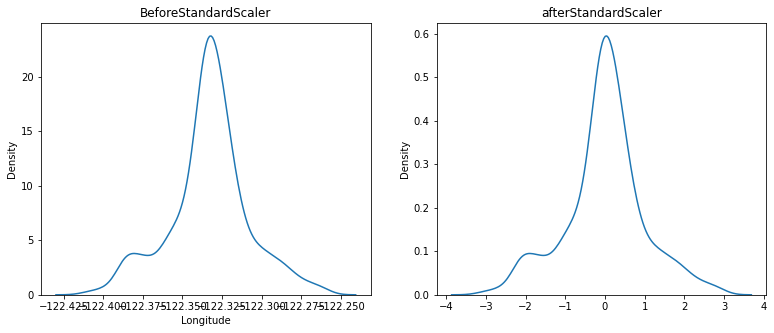

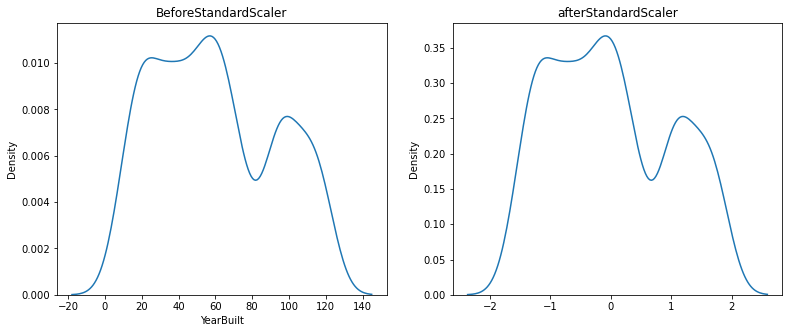

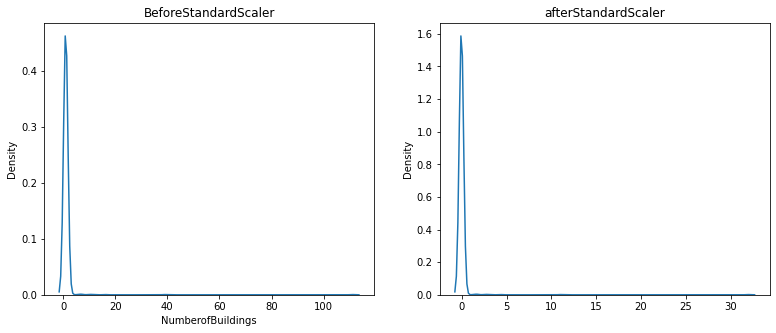

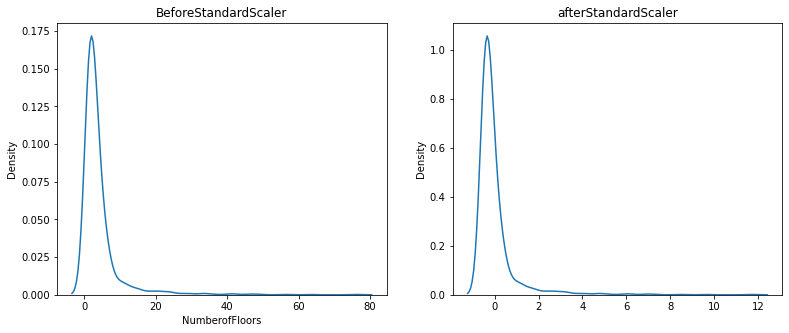

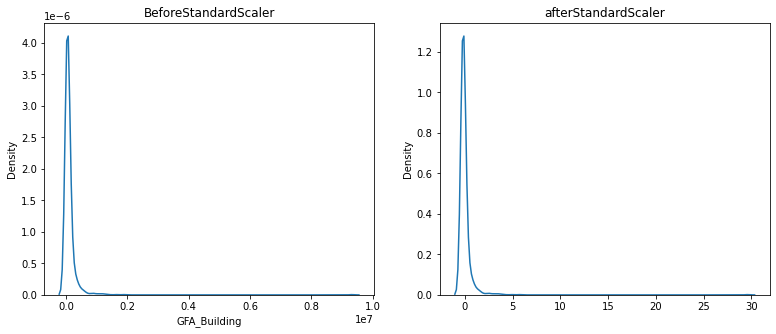

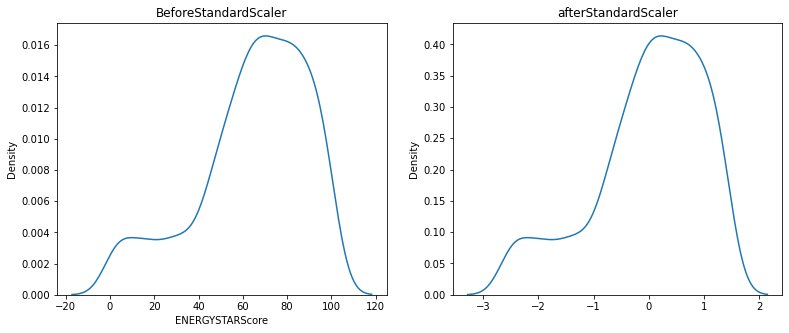

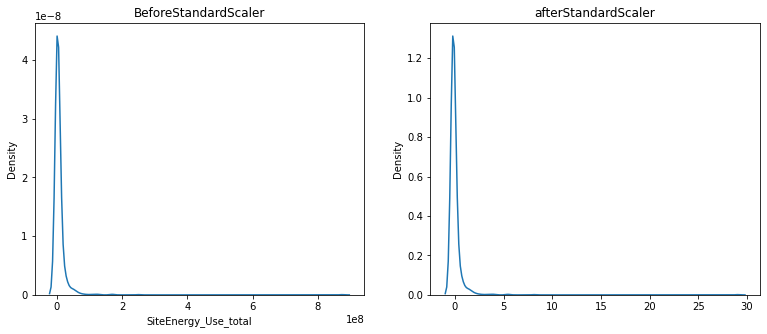

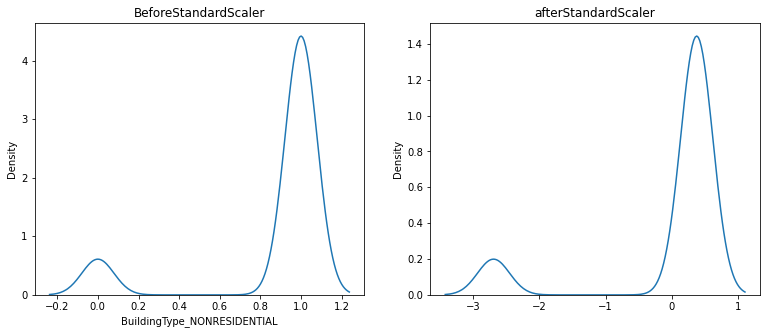

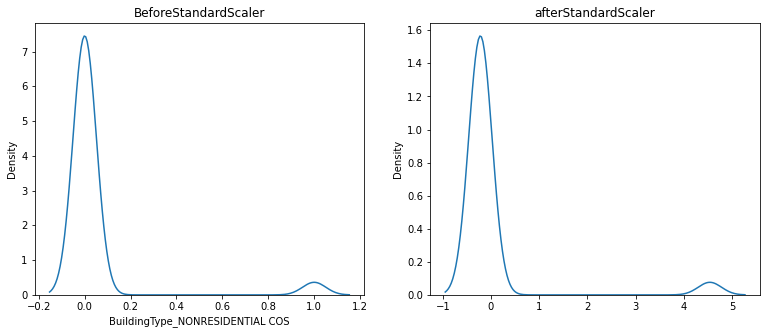

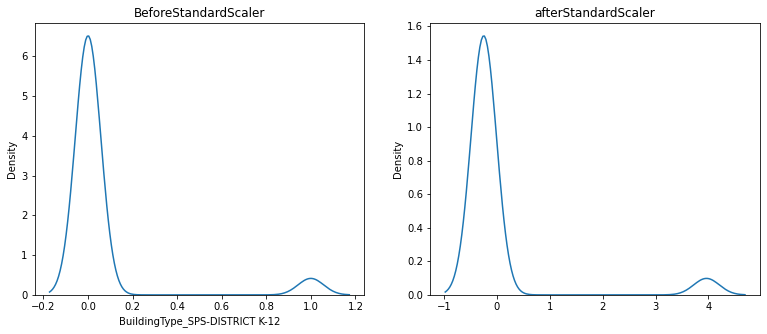

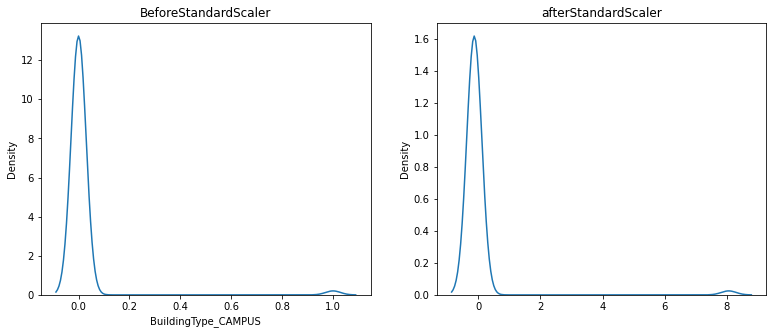

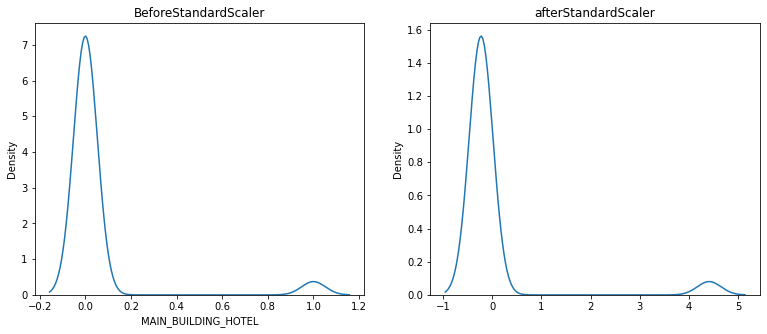

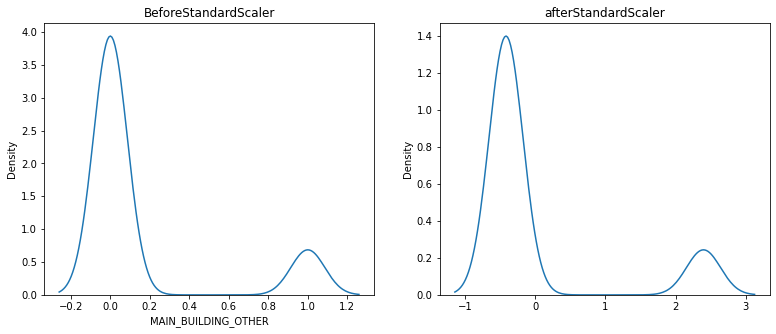

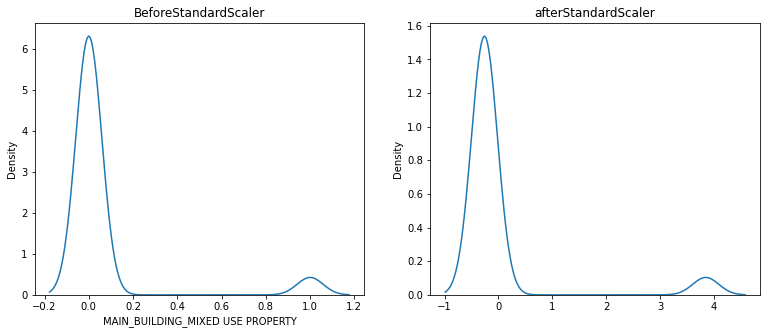

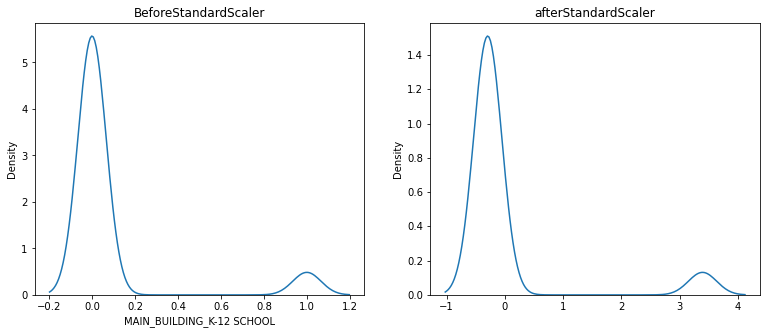

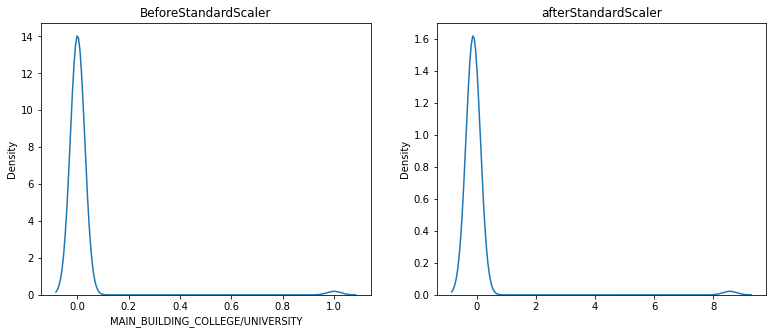

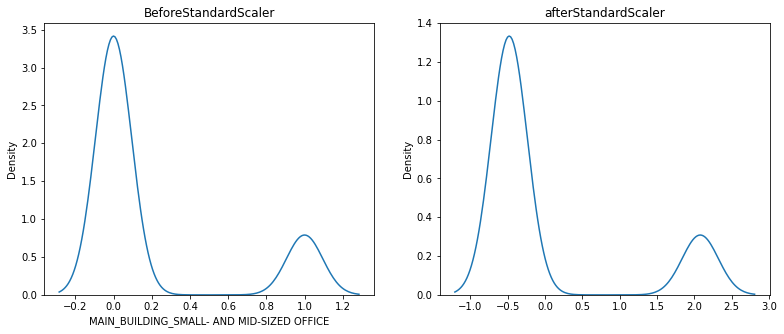

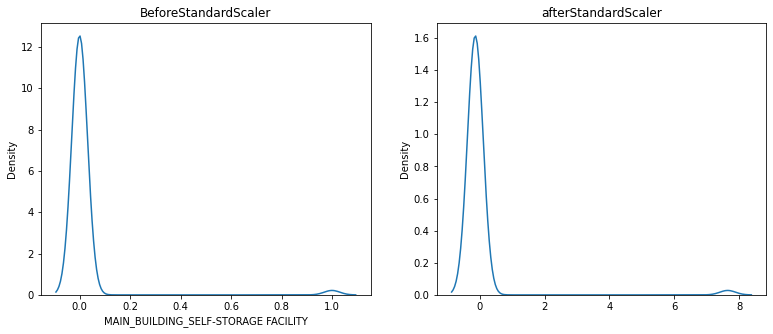

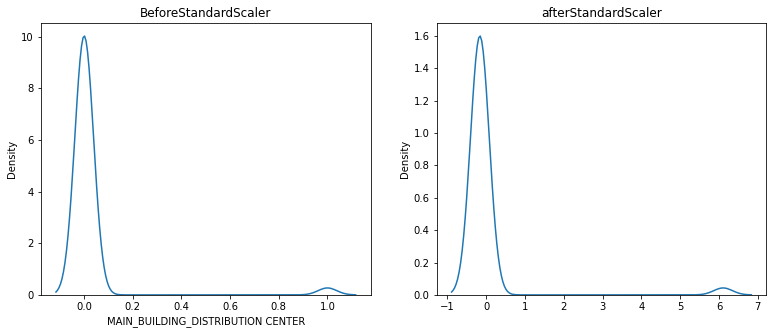

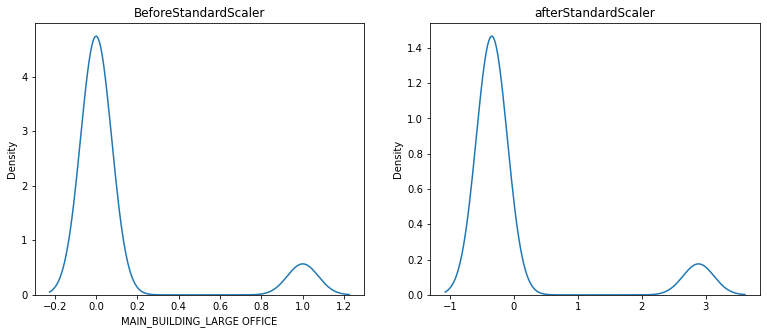

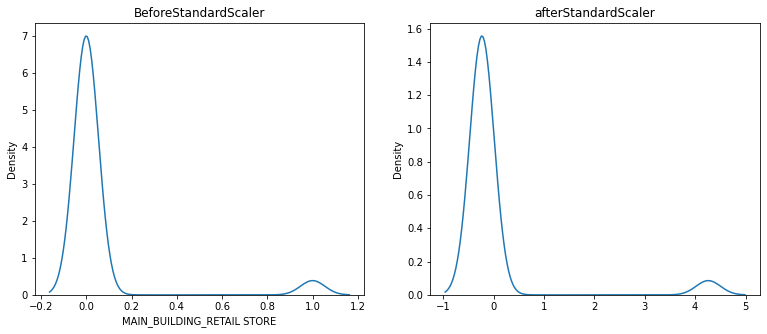

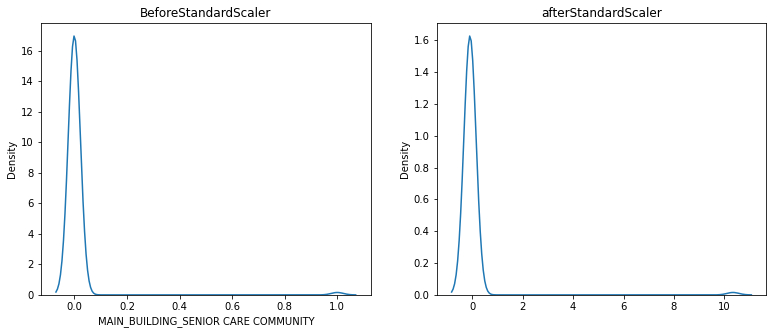

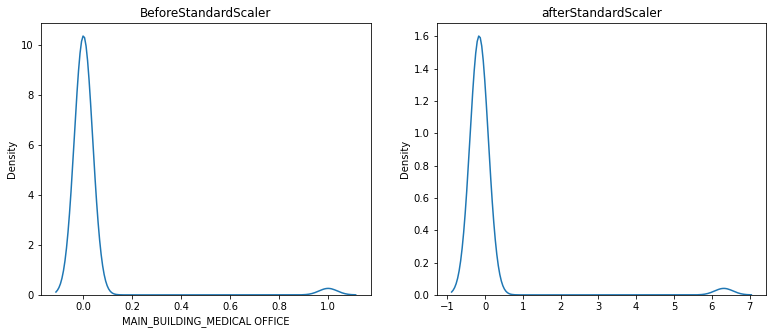

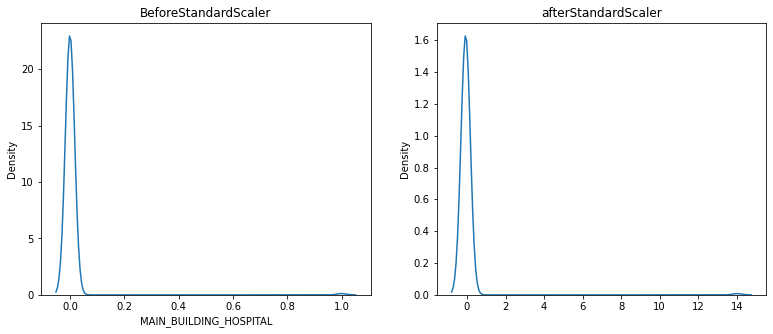

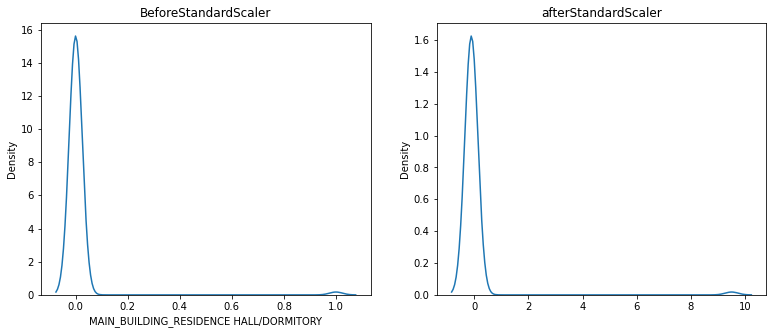

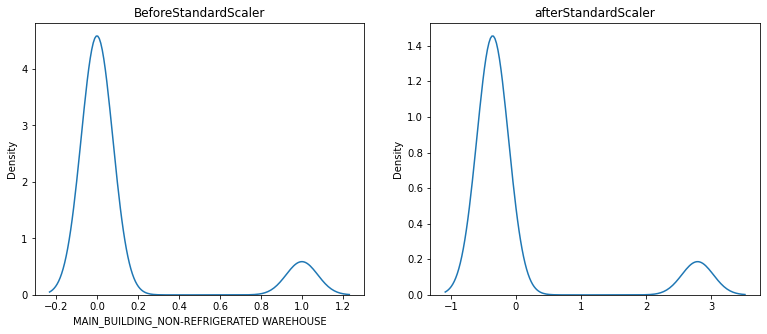

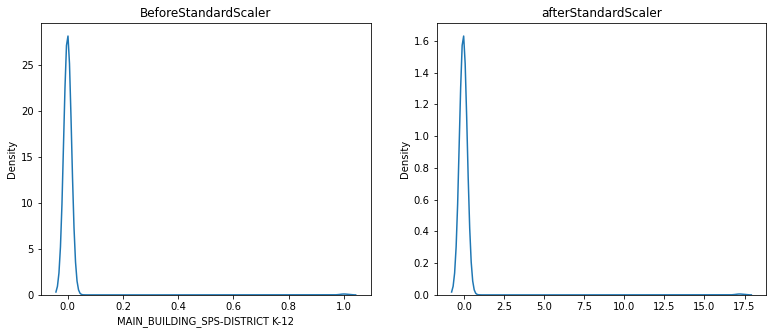

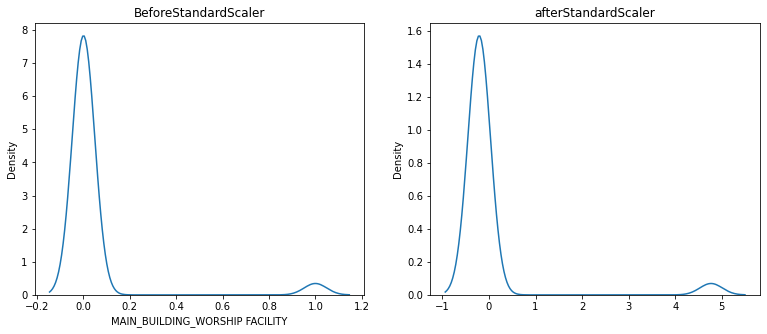

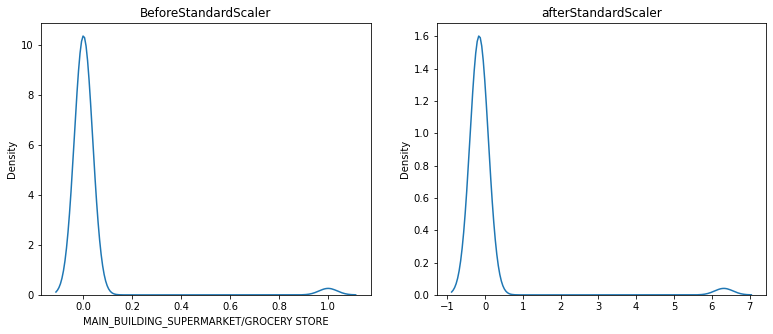

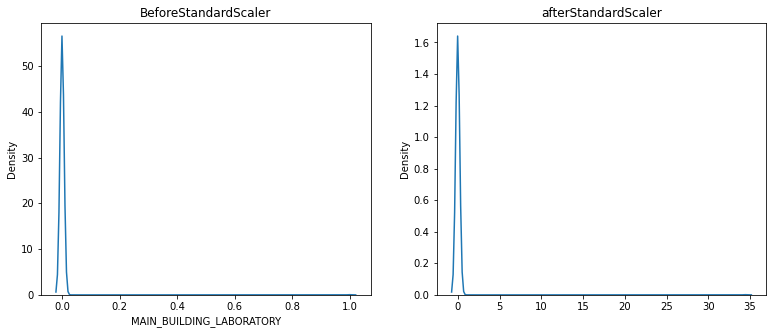

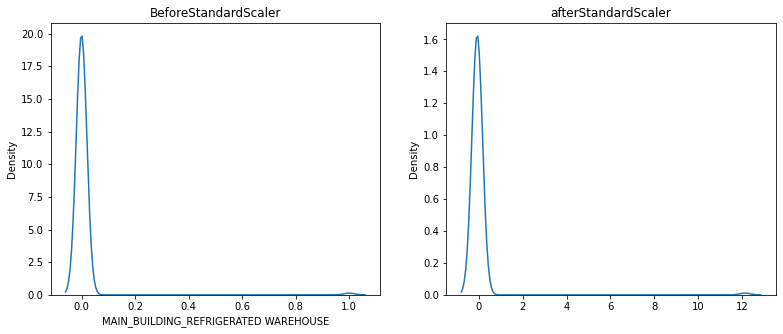

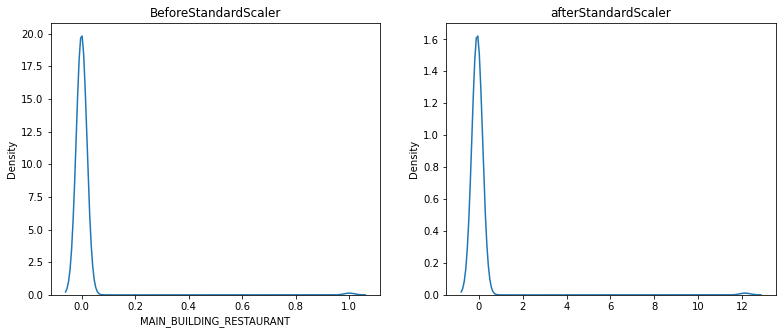

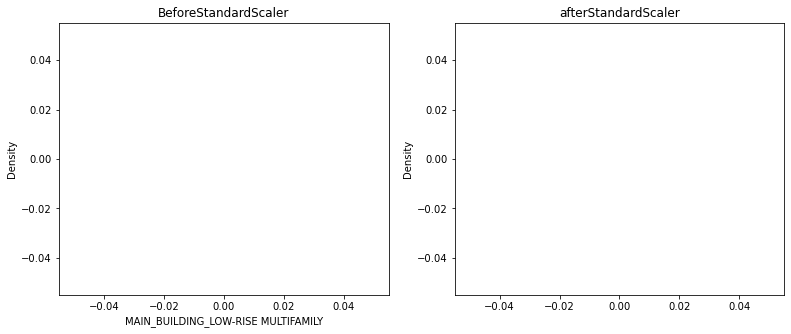

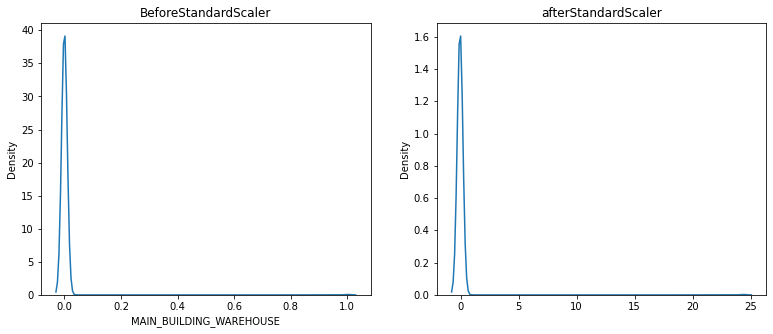

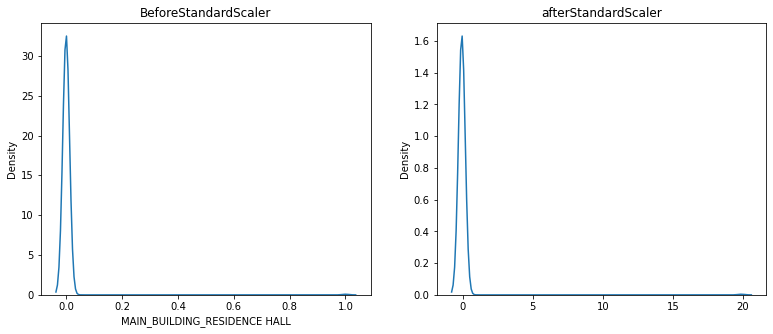

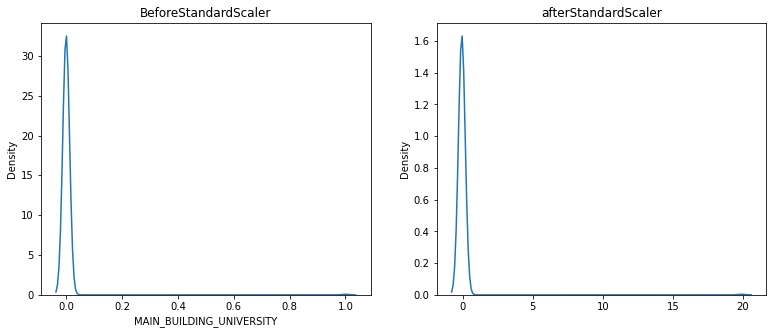

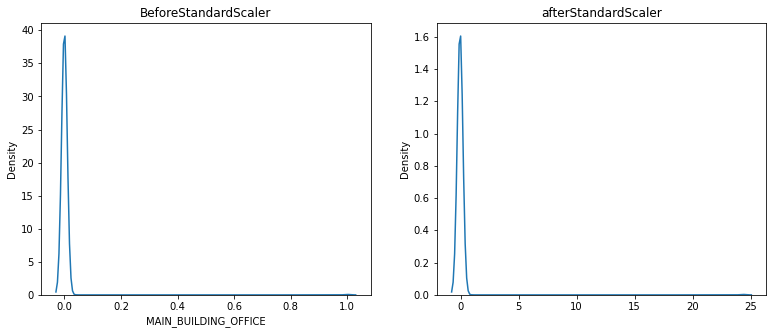

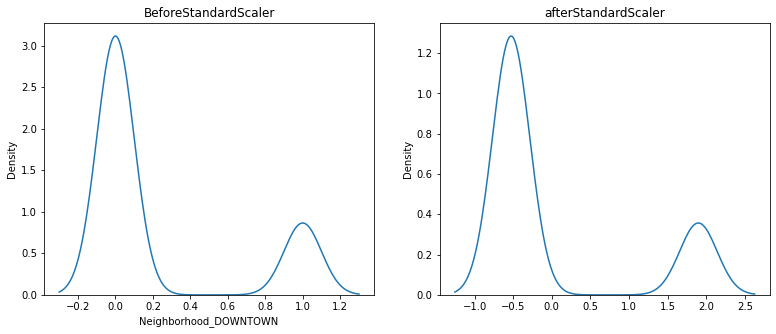

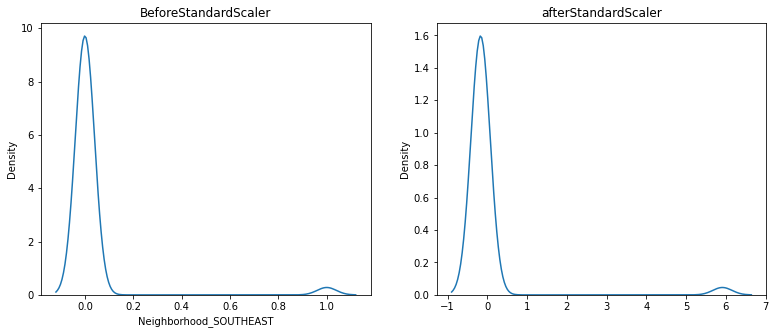

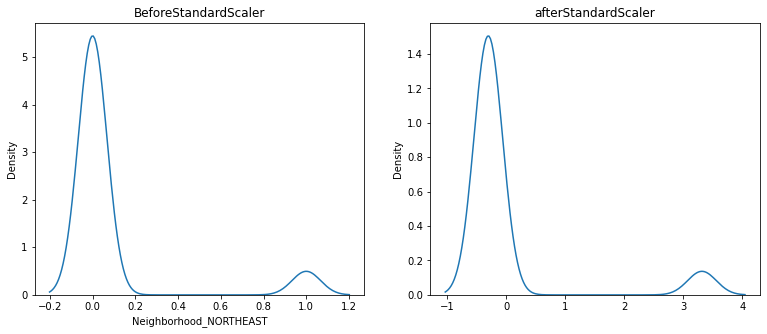

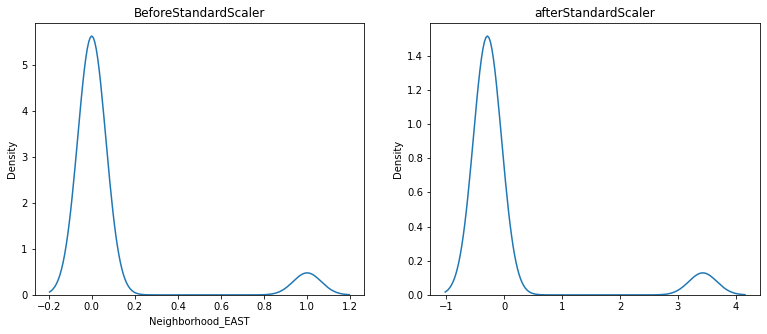

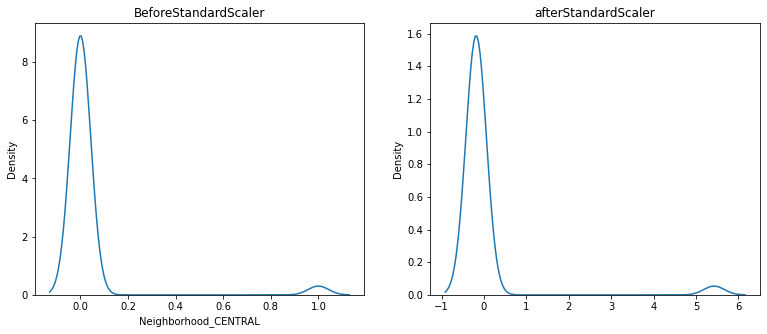

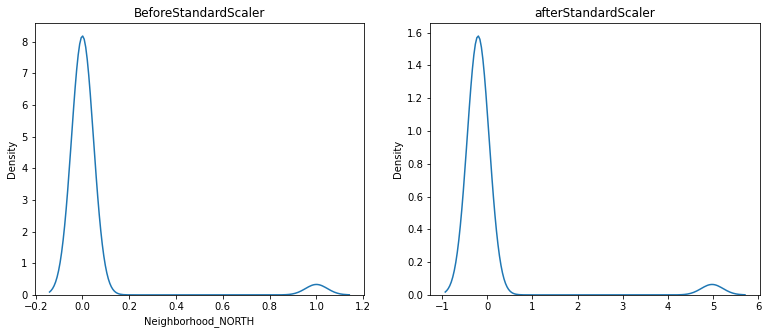

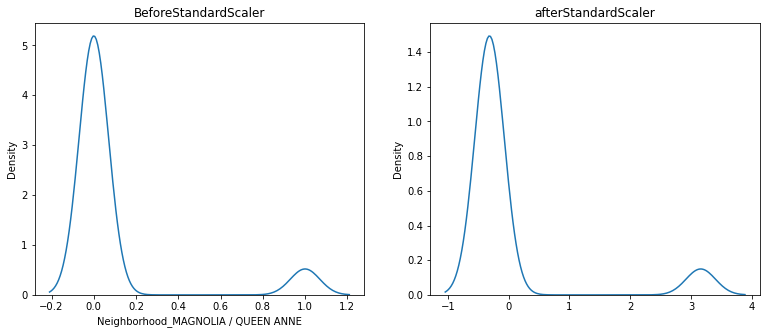

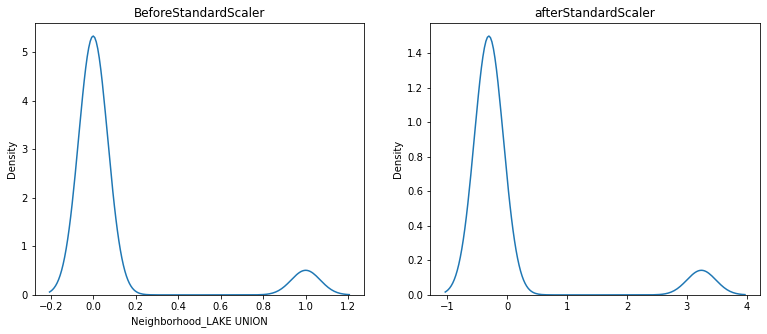

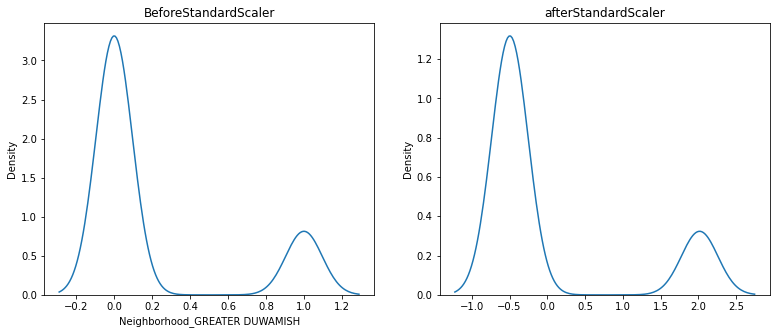

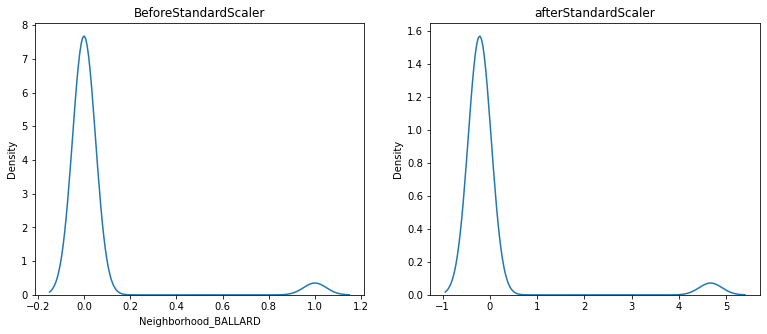

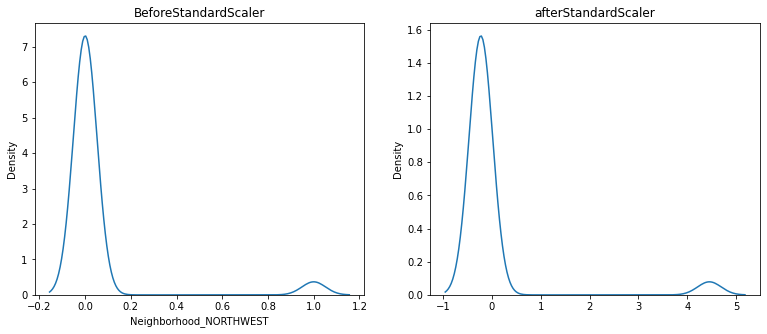

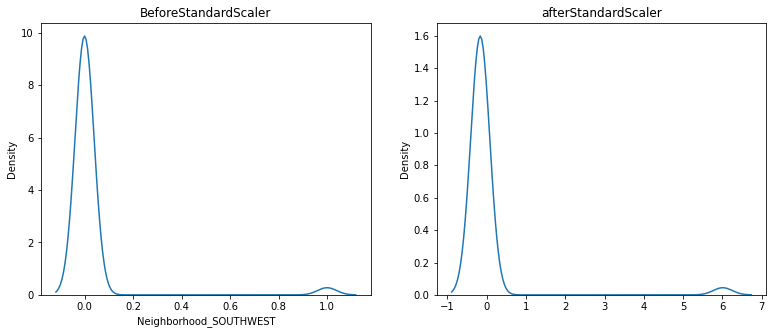

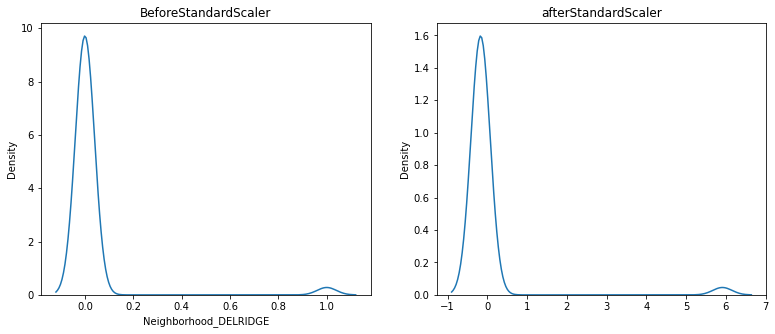

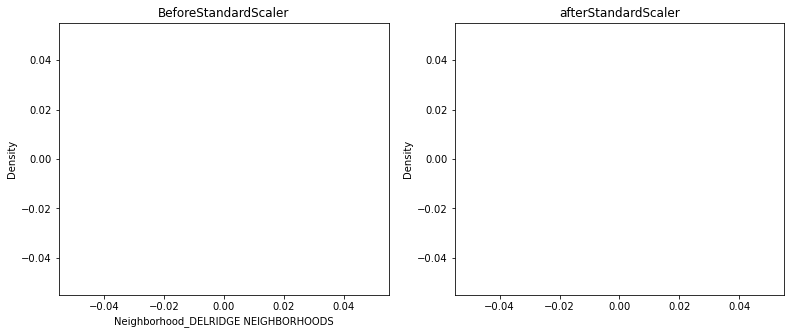

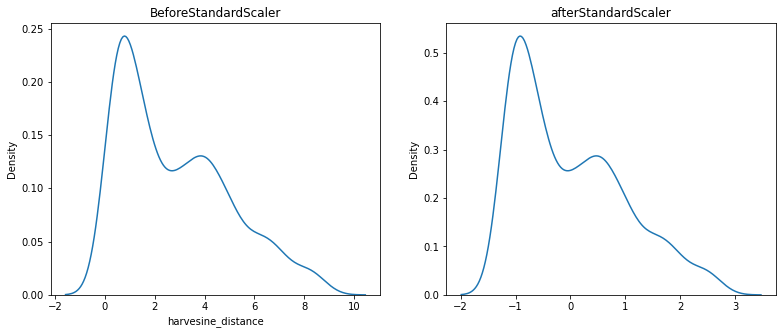

In [154]:
for col in X_train.columns:
    plots(X_train,col, StandardScaler())

In [80]:
#test_model_scaler(clf)

In [81]:
#function returning dictionary of model performances on the dataset received as argument
#We work with the r2 scores obtained after a cross validation, with 10 splits
def Model_Test(train, y):
    results = {}
    ss=StandardScaler()
    scaled_train=ss.fit_transform(train)
    
   
    def test_model(clf):
        cv = KFold(n_splits=10, shuffle=True, random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, y, cv=cv, scoring=r2)
        scores = r2_val_score
        return scores
    
    #for the model which needed standardized data 
    def test_model_scaler(clf):
        cv = KFold(n_splits=10, shuffle=True, random_state=42)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, scaled_train, y, cv=cv, scoring=r2)
        scores = r2_val_score
        return scores
    

    
    clf = LinearRegression()#hlr
    results["Linear"] = test_model_scaler(clf)
    print("Linear done")
    
    clf = Ridge()
    results["Ridge"] = test_model_scaler(clf)
    print("Ridge done")

   # clf = BayesianRidge()
   # results["Bayesian Ridge"] = test_model(clf)
   # print("Bayesian Ridge done")

    clf = Lasso(alpha=1e-4)
    results["Lasso"] = test_model_scaler(clf)
    print("Lasso done.")

   # clf = BaggingRegressor()
   # results["Bagging"] = test_model(clf)
   # print("Baggind done")

    clf = RandomForestRegressor()#hrf
    results["RandomForest"] = test_model(clf)
    print("Random forest done")
   

    clf = AdaBoostRegressor()
    results["AdaBoost"] = test_model(clf)
    print("Adaboost done")

    clf =SVR(kernel='rbf',gamma='auto',C=8)  ###  what is "C"
    results["SVM RBF"] = test_model_scaler(clf)
    print("SVM rbf done")
    
        # Prems Works if any remove this
    clf = KNeighborsRegressor()
    results["KNN Regressor"] = test_model_scaler(clf)
    print("KNN done")
    ############################ XGB##############################
    clf=XGBRegressor()
    results["XGB boost"] = test_model_scaler(clf)
    print("XGB done")
   
    return results 

In [82]:
#copy below three cell anbd pastye this after hyperparameter tuing

In [83]:
Best_Model=Model_Test(X_train,y_train)

Linear done
Ridge done
Lasso done.
Random forest done
Adaboost done
SVM rbf done
KNN done
XGB done


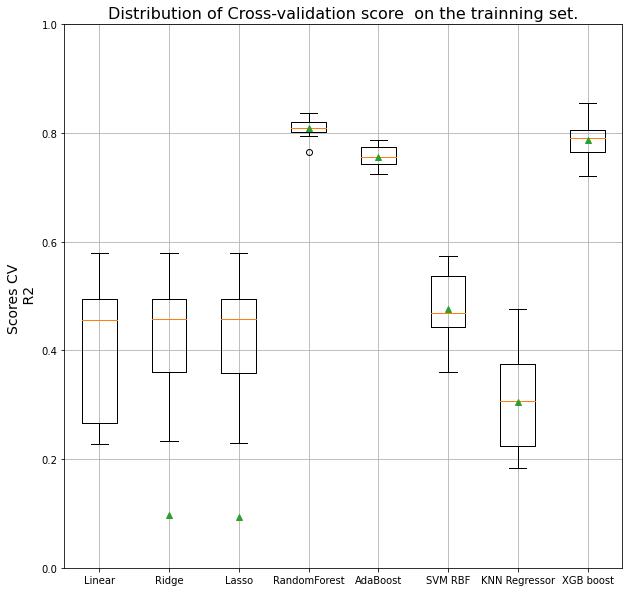

In [84]:
fig=plt.figure(figsize=[10,10])
#fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)    ##### what is Alpha
plt.title("Distribution of Cross-validation score  on the trainning set.",size=16)
plt.boxplot(Best_Model.values(),labels=Best_Model.keys(),showmeans=True)
plt.ylabel("Scores CV \n R2",size=14)
plt.ylim(0,1)
plt.grid()

In [85]:
# ridge

In [86]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model
import numpy as np

# On crée un modèle de régression linéaire
lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train,y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)

print(baseline_error)

1.3777949695466887


# <font color='red'> Hyper parameters  the model 

In [87]:
# https://www.kaggle.com/funxexcel/p2-random-forest-tuning-gridsearchcv

In [88]:


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]



In [89]:
'''

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

'''

"\n\n# Create the param grid\nparam_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap}\nprint(random_grid)\n\n"

In [90]:
#https://www.youtube.com/watch?v=50sWPzlmxOE

# Don't run this code it will take a lot of time just go to the Pickel

In [91]:
#3. RandomForest
print('Working with RandomForest')
model = RandomForestRegressor()
params = { 'n_estimators':np.arange(10,110,10), # starting value , ending value, step it needs to take
          'criterion':["mse", "mae"],
          'max_depth':[9], #1,2,3,4,5,6,7,8,10
          'min_samples_split':[3], #2,4
          'min_samples_leaf':[2] #1
    
    }
     
gs  = GridSearchCV( estimator = model,
param_grid = params,n_jobs = -1, verbose=2,cv = 5) 
    # n_jobs basciaclly is what level of your need to be utlized for performing the
    # activity (0,1,-1)
    #  -->-1 it will take total capacity of your cpu , be carefull it my make your pc slow while the activity is under execution
    # verbose:  it will show what is happpening behind 
    # CV = cross valisation how manytime it will cut the date to cross predition
    
gs.fit(X_train,y_train) 
hrf = gs.best_estimator_

Working with RandomForest
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [92]:
#hrf = pickle.load(open("hrf.pickle", 'rb'))

In [93]:
hrf

RandomForestRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=70)

In [94]:
import pickle

In [95]:
# we will pickle it because it takes time to run this code

import pickle

example_dict = {1:"6",2:"2",3:"f"}

pickle_out = open("hrf.pickle","wb")
pickle.dump(hrf, pickle_out)
pickle_out.close()

In [96]:
# the optimal valisation is 
# mae=mean absolute error
#RandomForestRegressor(criterion='mae', max_depth=9, min_samples_leaf=2,
#                      min_samples_split=3, n_estimators=10)

In [97]:
# use the best model 

# cross validation  info

In [98]:
#best_model=RandomForestRegressor(n_estimators=300, max_depth=15,max_features=2)
best_model=hrf
def test_model(model,X,y):
        cv = KFold(n_splits=10, shuffle=True, random_state=42) # CV = cross validaton = 
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(model, X, y, cv=cv, scoring=r2)# model=
        scores = r2_val_score
        return scores
the_scores=test_model(best_model,X_train,y_train)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
validation_score=r2_score(y_test,y_pred)

# its a combination between 74 and 76

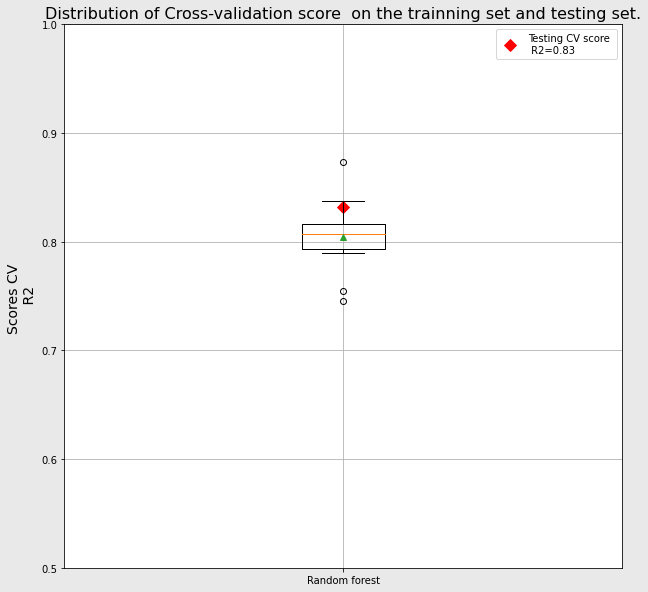

In [99]:
fig=plt.figure(figsize=[10,10])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of Cross-validation score  on the trainning set and testing set.",size=16)
plt.boxplot(the_scores,showmeans=True)
plt.scatter(x=[1],y=[validation_score],s=70,c="r",marker="D",label="Testing CV score \n R2={}".format(round(validation_score,2)))
plt.ylabel("Scores CV \n R2",size=14)
plt.xticks([1],["Random forest"])
plt.ylim(0.5,1)
plt.xlim(0.5,1.5)
plt.grid()
plt.legend()


3. Results analysis: Testing Set

First,I determine the features that impact the prediction the most


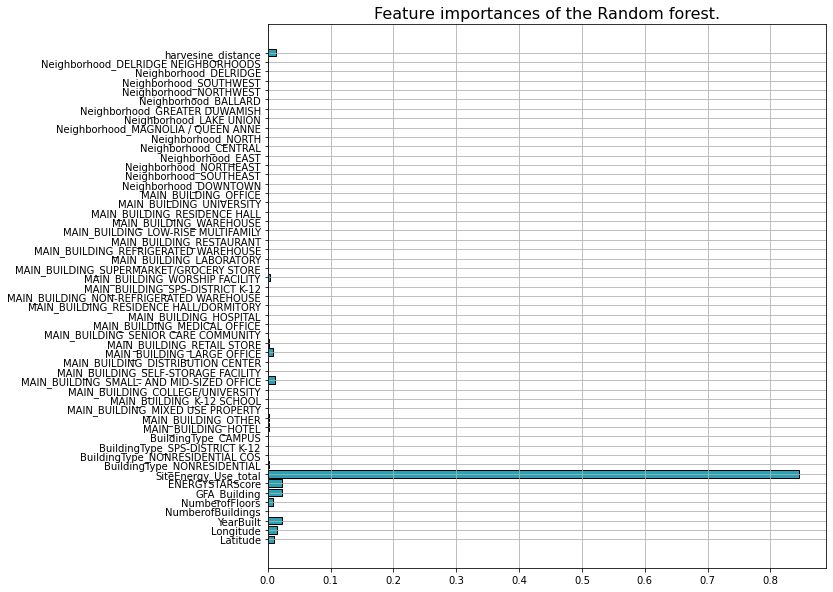

In [100]:
fig=plt.figure(figsize=[10,10])
#fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7) # how clear the picture will be 
plt.title("Feature importances of the Random forest.",size=16)
plt.barh(X.columns, best_model.feature_importances_,color="#28a2b4",edgecolor='black')
plt.grid()

# make a graph to see the result clrealy

In [101]:
df_res=pd.DataFrame({"True values": y_test,"Predictions":y_pred})
df_res["Error"]=abs(df_res["True values"]-df_res["Predictions"])/df_res["True values"]*100
df_res.head()
def color_to_use(num):
    if np.isinf(num):
        return "#cc2900"
    elif num> 80:
        return "#cc2900"
    elif num >50:
        return "#dfa61f"
    elif num>30:
        return "#dddf1f"
    elif num>10:
        return "#7cce2e"
    else:
        return "#13a90d"
df_res["color to use"]=df_res["Error"].apply(color_to_use)
df_res.head()

,True values,Predictions,Error,color to use
618,2.603710,2.815066,8.117518,#13a90d
115,5.308652,5.236998,1.349759,#13a90d
135,5.599146,5.255986,6.128776,#13a90d
350,4.988935,5.010034,0.422916,#13a90d
1394,5.333646,4.947488,7.240042,#13a90d


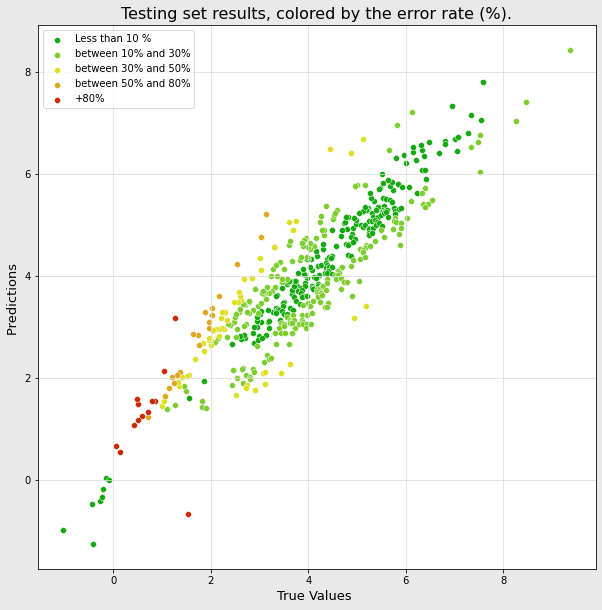

In [102]:
df_res=df_res.sort_values(by = "Error")
dict_lab={"#cc2900":'+80%','#dfa61f':"between 50% and 80%"
          ,'#dddf1f':"between 30% and 50%"
          ,'#7cce2e':"between 10% and 30%"
          ,'#13a90d':"Less than 10 %"}
fig=plt.figure(figsize=[10,10])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Testing set results, colored by the error rate (%).",size=16)
for c in df_res["color to use"].unique():
    d=df_res.loc[df_res["color to use"]==c]
    sns.scatterplot(data=d,x="True values",y="Predictions",color=c,label=dict_lab[c])

plt.xlabel('True Values ',size=13)
plt.ylabel('Predictions ',size=13)
plt.grid(color='#dddddd')

# graph to see the same on 82  but it's grouped into 4 different group of level of errors depending on the the accuracy and the emission each level product

In [103]:
def regroup(num):
    if num<50:
        return "- 50"
    elif num<150:
        return "50-150"
    elif num<250:
        return "150-250"
    else:
        return "+250"
df_res["regroup"]=df_res["True values"].apply(regroup)
df_res=df_res.sort_values(by = "True values")

Text(0.5, 0, 'CO2 emissions (Metric Tones)')

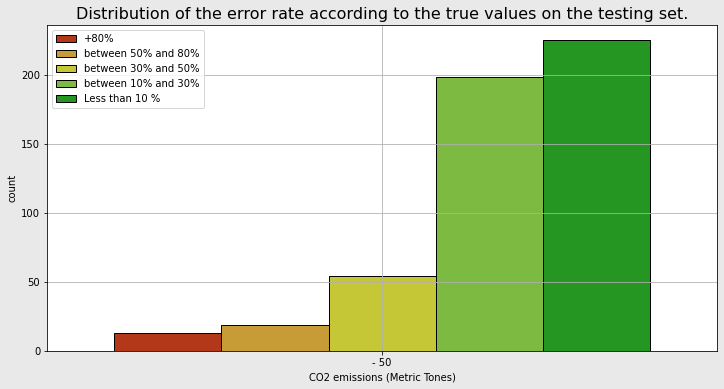

In [104]:
fig=plt.figure(figsize=[12,6])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of the error rate according to the true values on the testing set.",size=16)
sns.countplot(data=df_res,x="regroup",hue="color to use",hue_order=dict_lab.keys(),palette=['#cc2900', '#dfa61f', '#dddf1f', '#7cce2e', '#13a90d'], edgecolor="black")
plt.legend(dict_lab.values())
plt.grid()
plt.xlabel("CO2 emissions (Metric Tones)")

# prediction energetique

# Pre prossessing

In [105]:
# delete if you want to keep the past details
data=df18

In [106]:
# https://www.kaggle.com/negstek/prediction-energetique-3-modelisation-simple

In [107]:

# this show what columns are objects and what are Nombres
objectColumns = list(data.dtypes[data.dtypes == np.object].index)
numericColumns = list(data.dtypes[data.dtypes != np.object].index)
print(objectColumns)
print(numericColumns)

[]
['OSE_ID', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'GFA_Building', 'ENERGYSTARScore', 'SiteEnergy_Use_total', 'BuildingType_NONRESIDENTIAL', 'BuildingType_NONRESIDENTIAL COS', 'BuildingType_SPS-DISTRICT K-12', 'BuildingType_CAMPUS', 'MAIN_BUILDING_HOTEL', 'MAIN_BUILDING_OTHER', 'MAIN_BUILDING_MIXED USE PROPERTY', 'MAIN_BUILDING_K-12 SCHOOL', 'MAIN_BUILDING_COLLEGE/UNIVERSITY', 'MAIN_BUILDING_SMALL- AND MID-SIZED OFFICE', 'MAIN_BUILDING_SELF-STORAGE FACILITY', 'MAIN_BUILDING_DISTRIBUTION CENTER', 'MAIN_BUILDING_LARGE OFFICE', 'MAIN_BUILDING_RETAIL STORE', 'MAIN_BUILDING_SENIOR CARE COMMUNITY', 'MAIN_BUILDING_MEDICAL OFFICE', 'MAIN_BUILDING_HOSPITAL', 'MAIN_BUILDING_RESIDENCE HALL/DORMITORY', 'MAIN_BUILDING_NON-REFRIGERATED WAREHOUSE', 'MAIN_BUILDING_SPS-DISTRICT K-12', 'MAIN_BUILDING_WORSHIP FACILITY', 'MAIN_BUILDING_SUPERMARKET/GROCERY STORE', 'MAIN_BUILDING_LABORATORY', 'MAIN_BUILDING_REFRIGERATED WAREHOUSE', 'MAIN_BUILDING_RESTAURANT', 'MAIN_BU

In [108]:
pd.DataFrame([df18.dtypes])

,OSE_ID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,GFA_Building,ENERGYSTARScore,SiteEnergy_Use_total,BuildingType_NONRESIDENTIAL,BuildingType_NONRESIDENTIAL COS,BuildingType_SPS-DISTRICT K-12,BuildingType_CAMPUS,MAIN_BUILDING_HOTEL,MAIN_BUILDING_OTHER,MAIN_BUILDING_MIXED USE PROPERTY,MAIN_BUILDING_K-12 SCHOOL,MAIN_BUILDING_COLLEGE/UNIVERSITY,MAIN_BUILDING_SMALL- AND MID-SIZED OFFICE,MAIN_BUILDING_SELF-STORAGE FACILITY,MAIN_BUILDING_DISTRIBUTION CENTER,MAIN_BUILDING_LARGE OFFICE,MAIN_BUILDING_RETAIL STORE,MAIN_BUILDING_SENIOR CARE COMMUNITY,MAIN_BUILDING_MEDICAL OFFICE,MAIN_BUILDING_HOSPITAL,MAIN_BUILDING_RESIDENCE HALL/DORMITORY,MAIN_BUILDING_NON-REFRIGERATED WAREHOUSE,MAIN_BUILDING_SPS-DISTRICT K-12,MAIN_BUILDING_WORSHIP FACILITY,MAIN_BUILDING_SUPERMARKET/GROCERY STORE,MAIN_BUILDING_LABORATORY,MAIN_BUILDING_REFRIGERATED WAREHOUSE,MAIN_BUILDING_RESTAURANT,MAIN_BUILDING_LOW-RISE MULTIFAMILY,MAIN_BUILDING_WAREHOUSE,MAIN_BUILDING_RESIDENCE HALL,MAIN_BUILDING_UNIVERSITY,MAIN_BUILDING_OFFICE,Neighborhood_DOWNTOWN,Neighborhood_SOUTHEAST,Neighborhood_NORTHEAST,Neighborhood_EAST,Neighborhood_CENTRAL,Neighborhood_NORTH,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_LAKE UNION,Neighborhood_GREATER DUWAMISH,Neighborhood_BALLARD,Neighborhood_NORTHWEST,Neighborhood_SOUTHWEST,Neighborhood_DELRIDGE,Neighborhood_DELRIDGE NEIGHBORHOODS,harvesine_distance,Log_Emissions_CO2e,Log_Emissions_CO2e_FT,Log_Site_EUI_SF
0,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64


In [109]:
# this show the count of unique values of each colomns

for column in objectColumns:
    print('{}: {} uniques values'.format(column,len(data[column].unique())))



In [110]:
X_train["SiteEnergy_Use_total"].max()

874230661.2264758

In [111]:
# drop the Max Column of SiteEnergy_Use_total then start 

In [112]:
X_train["SiteEnergy_Use_total"].median()

2450804.4

In [113]:
#columns_to_drop=['SiteEnergyUse(kBtu)','Energy/Surface', 'TotalGHGEmissions', 'GHG/Surface']
#y_columns=['Energy/Surface', 'GHG/Surface']

y_columns = ['SiteEnergy_Use_total',"Log_Emissions_CO2e"]
X = data.drop(y_columns, axis=1)

print(X.shape)
y = data[y_columns]
print(y.shape)
print(len(numericColumns))
for i in y_columns:
    numericColumns.remove(i)
print(len(numericColumns))

# X = data.drop(['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], axis=1)
# y = data(['TotalGHGEmissions'])

(1696, 55)
(1696, 2)
57
55


In [114]:
>>> from sklearn.preprocessing import StandardScaler, OneHotEncoder
>>> from sklearn.compose import make_column_transformer

In [115]:
# standardiser les données
preprocessor = make_column_transformer((StandardScaler(),numericColumns),
                                       (OneHotEncoder(handle_unknown = 'ignore'),
                                        objectColumns))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [116]:
pd.DataFrame(preprocessor.fit_transform(X_train),columns = X_train.columns).isnull().sum()

OSE_ID                                       0
Latitude                                     0
Longitude                                    0
YearBuilt                                    0
NumberofBuildings                            0
NumberofFloors                               0
GFA_Building                                 0
ENERGYSTARScore                              0
BuildingType_NONRESIDENTIAL                  0
BuildingType_NONRESIDENTIAL COS              0
BuildingType_SPS-DISTRICT K-12               0
BuildingType_CAMPUS                          0
MAIN_BUILDING_HOTEL                          0
MAIN_BUILDING_OTHER                          0
MAIN_BUILDING_MIXED USE PROPERTY             0
MAIN_BUILDING_K-12 SCHOOL                    0
MAIN_BUILDING_COLLEGE/UNIVERSITY             0
MAIN_BUILDING_SMALL- AND MID-SIZED OFFICE    0
MAIN_BUILDING_SELF-STORAGE FACILITY          0
MAIN_BUILDING_DISTRIBUTION CENTER            0
MAIN_BUILDING_LARGE OFFICE                   0
MAIN_BUILDING

In [117]:
df18['Log_Emissions_CO2e_FT'].isnull().sum()

0

In [118]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor, ElasticNet
from sklearn.svm import SVR # support vector regression
from sklearn.preprocessing import *
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from xgboost import XGBRegressor

In [119]:


results = []
algos = {
    'LinearRegression' : LinearRegression(),
    'Ridge' : Ridge(),
    #'Lasso' : Lasso(tol=0.5),
    #'ElasticNet' : ElasticNet(),
    #'SGDRegressor': SGDRegressor(),
    'Adaboost': AdaBoostRegressor(),
    'SVR': SVR(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'XGBRegressor' : XGBRegressor(),
    'knn':KNeighborsRegressor() # added this as new
}
X_train, X_test, y_train_all, y_test_all = train_test_split(X, y, test_size=0.2, random_state=1)



# Prediction models with Energy score

In [120]:
#X_train, X_test, y_train, y_test = train_test_split(X.drop(''), y, test_size=0.2)
for algo_name, algo in algos.items():
    print('Algorithme: ',algo_name)
    for column in y_columns:
        y_test = y_test_all[column]
        y_train = y_train_all[column]
        model = make_pipeline(preprocessor,algo)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print('Prédiction de ',column)
        print('score d\'entrainement = ',model.score(X_train,y_train))  #R2 for training
        print("score de la prédiction: ",  model.score(X_test, y_test))  #  R2 for testing
        mae = mean_absolute_error(y_test,y_pred)
        rmse = np.sqrt(mean_squared_error(y_test,y_pred))
        med_abs_err = median_absolute_error(y_test,y_pred)
        print("MAE = ", mae)        
        print("RMSE = ",rmse)
        print("median abs err = ", med_abs_err)
        print('')
        results.append([algo_name, column, model.score(X_test, y_test), mae, rmse, med_abs_err])
    print('-'*100)

Algorithme:  LinearRegression
Prédiction de  SiteEnergy_Use_total
score d'entrainement =  0.8802390725174867
score de la prédiction:  -3.8796336761244934e+21
MAE =  1.1997630682980805e+17
RMSE =  1.2772453207373164e+18
median abs err =  2468648.612130592

Prédiction de  Log_Emissions_CO2e
score d'entrainement =  0.9200429955286917
score de la prédiction:  -9.37411320301158e+21
MAE =  14126284374.394152
RMSE =  150385781106.04657
median abs err =  0.28706692713187465

----------------------------------------------------------------------------------------------------
Algorithme:  Ridge
Prédiction de  SiteEnergy_Use_total
score d'entrainement =  0.8802367157544304
score de la prédiction:  0.7132817851961168
MAE =  4384292.019183539
RMSE =  10980107.752104698
median abs err =  2464614.2677338086

Prédiction de  Log_Emissions_CO2e
score d'entrainement =  0.9200431860670589
score de la prédiction:  0.9103084236061921
MAE =  0.3388022441515722
RMSE =  0.4651762223901464
median abs err =  0.2

In [121]:
X_train = X_train.drop(['ENERGYSTARScore'], axis=1)
X_test = X_test.drop(['ENERGYSTARScore'], axis=1)
results_without_energyStarScore = []
numericColumns.remove('ENERGYSTARScore')
print(numericColumns)
preprocessor = make_column_transformer((RobustScaler(),numericColumns),(OneHotEncoder(handle_unknown = 'ignore'),objectColumns))

['OSE_ID', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'GFA_Building', 'BuildingType_NONRESIDENTIAL', 'BuildingType_NONRESIDENTIAL COS', 'BuildingType_SPS-DISTRICT K-12', 'BuildingType_CAMPUS', 'MAIN_BUILDING_HOTEL', 'MAIN_BUILDING_OTHER', 'MAIN_BUILDING_MIXED USE PROPERTY', 'MAIN_BUILDING_K-12 SCHOOL', 'MAIN_BUILDING_COLLEGE/UNIVERSITY', 'MAIN_BUILDING_SMALL- AND MID-SIZED OFFICE', 'MAIN_BUILDING_SELF-STORAGE FACILITY', 'MAIN_BUILDING_DISTRIBUTION CENTER', 'MAIN_BUILDING_LARGE OFFICE', 'MAIN_BUILDING_RETAIL STORE', 'MAIN_BUILDING_SENIOR CARE COMMUNITY', 'MAIN_BUILDING_MEDICAL OFFICE', 'MAIN_BUILDING_HOSPITAL', 'MAIN_BUILDING_RESIDENCE HALL/DORMITORY', 'MAIN_BUILDING_NON-REFRIGERATED WAREHOUSE', 'MAIN_BUILDING_SPS-DISTRICT K-12', 'MAIN_BUILDING_WORSHIP FACILITY', 'MAIN_BUILDING_SUPERMARKET/GROCERY STORE', 'MAIN_BUILDING_LABORATORY', 'MAIN_BUILDING_REFRIGERATED WAREHOUSE', 'MAIN_BUILDING_RESTAURANT', 'MAIN_BUILDING_LOW-RISE MULTIFAMILY', 'MAIN_BUILDING_W

# created a loop to show each result  of the prediction and add them to a new Dataframe 


In [122]:
import timeit
''''
rfc2 = RandomForestClassifier(n_estimators=500, oob_score=True)

start_time = timeit.default_timer()

rfc2 = rfc2.fit(X_train2, y_train)

X_test2 = select.transform(X_test)

pred = rfc2.predict(X_test2)
elapsed = timeit.default_timer() - start_time
accuracy = accuracy_score(y_test, pred)

print("accuracy {:.2f} time {:.2f}s".format(accuracy, elapsed))'''

'\'\nrfc2 = RandomForestClassifier(n_estimators=500, oob_score=True)\n\nstart_time = timeit.default_timer()\n\nrfc2 = rfc2.fit(X_train2, y_train)\n\nX_test2 = select.transform(X_test)\n\npred = rfc2.predict(X_test2)\nelapsed = timeit.default_timer() - start_time\naccuracy = accuracy_score(y_test, pred)\n\nprint("accuracy {:.2f} time {:.2f}s".format(accuracy, elapsed))'

# Hyperparameter models

In [123]:
#Put All hyper Parameter tuing model here

# Linear regression
hlr = LinearRegression()

#rigde

model = Ridge()
params = {
    'alpha':[0.1,1],
    'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
gs  = GridSearchCV( estimator = model,param_grid = params,n_jobs = -1, verbose=2,cv = 5)
gs.fit(X_train,y_train) 
hridge = gs.best_estimator_


# svr

# skipping this because it will take lot of time to run [1 -  2 days]

#KNN model
print('Working with Knn regressor: ')
model = KNeighborsRegressor()
params = {
     'n_neighbors':[3,5],# np.arange(3,10,1)
    'weights':['uniform','distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

gs  = GridSearchCV( estimator = model,param_grid = params,n_jobs = -1, verbose=2,cv = 5)
gs.fit(X_train,y_train) 
hknn = gs.best_estimator_

#adaboost
print('Working with AdaBoost')
model = AdaBoostRegressor()
from sklearn.tree import DecisionTreeRegressor
params= {
    'base_estimator':[ DecisionTreeRegressor()], # we use the past model HDT an apply it on Adaboost  because they perform good with decision trees
    'n_estimators':[10,20,30,40,50,60,70,80], # number of decision trees we need
    'learning_rate':[0.01,0.1,1.0],  # how fast and how it should learn the partners. here we are asking to learn slowly then fast 
    'loss' : ['linear', 'square', 'exponential'], # based on what our model it should perform
    }
gs  = GridSearchCV( estimator = model,
param_grid = params,n_jobs = -1, verbose=2,cv = 5)

gs.fit(X_train,y_train)
hab = gs.best_estimator_


# randomforest
print('Working with RandomForest')
model = RandomForestRegressor()
params = { 'n_estimators':np.arange(10,110,10), # starting value , ending value, step it needs to take
          'criterion':["mse", "mae"],
          'max_depth':[9], #1,2,3,4,5,6,7,8,10
          'min_samples_split':[3], #2,4
          'min_samples_leaf':[2] #1
    
    }
     
gs  = GridSearchCV( estimator = model,
param_grid = params,n_jobs = -1, verbose=2,cv = 5) 
    # n_jobs basciaclly is what level of your need to be utlized for performing the
    # activity (0,1,-1)
    #  -->-1 it will take total capacity of your cpu , be carefull it my make your pc slow while the activity is under execution
    # verbose:  it will show what is happpening behind 
    # CV = cross valisation how manytime it will cut the date to cross predition
    
gs.fit(X_train,y_train) 
hrf = gs.best_estimator_


#xgb
print('Working with XGBOOST')
model = XGBRegressor(verbosity = 0,use_label_encoder = False)
params={
     #'objective':['binary:logistic','binary:hinge'],
    'n_estimators':[ 10,20,30,40,50,60,70,80],# 10,20,30,40,50,60,70,
    'max_depth':[1,2,3,4,5,6,7,8,9,10], #1,2,3,4,5,6,7,8,9,
    'learning_rate':[0.01,0.1,1.0]
    }
gs  = GridSearchCV( estimator = model,
        param_grid = params,n_jobs = -1, verbose=2,cv = 5)

gs.fit(X_train,y_train)
hxgb= gs.best_estimator_

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Working with Knn regressor: 
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Working with AdaBoost
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Working with RandomForest
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Working with XGBOOST
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [124]:
hlr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [125]:
hknn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [126]:
hridge.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [127]:
hab.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__criterion': 'mse',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeRegressor(),
 'learning_rate': 1.0,
 'loss': 'exponential',
 'n_estimators': 80,
 'random_state': None}

In [128]:
hrf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 9,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [129]:
hxgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 80,
 'n_jobs': 12,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': 0,
 'use_label_encoder': False}

In [130]:
#RandomForestRegressor.get_params()

TypeError: get_params() missing 1 required positional argument: 'self'

In [131]:
hknn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# we are applying the standard scaller to all the models

In [132]:
#function returning dictionary of model performances on the dataset received as argument
#We work with the r2 scores obtained after a cross validation, with 10 splits
def Model_Test(train, y):
    results = {}
    ss=StandardScaler()
    scaled_train=ss.fit_transform(train)
    
   
    def test_model(clf):
        cv = KFold(n_splits=10, shuffle=True, random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, y, cv=cv, scoring=r2)
        scores = r2_val_score
        return scores
    
    #for the model which needed standardized data 
    def test_model_scaler(clf):
        cv = KFold(n_splits=10, shuffle=True, random_state=42)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, scaled_train, y, cv=cv, scoring=r2)
        scores = r2_val_score
        return scores
    

    
    clf = hlr
    results["Linear"] = test_model_scaler(clf)
    print("Linear done")
    
    clf = hridge
    results["Ridge"] = test_model_scaler(clf)
    print("Ridge done")


    clf = RandomForestRegressor()#hrf
    results["RandomForest"] = test_model(clf)
    print("Random forest done")
   

    clf = AdaBoostRegressor()
    results["AdaBoost"] = test_model(clf)
    print("Adaboost done")

    clf =SVR(kernel='rbf',gamma='auto',C=8)  ###  what is "C"
    results["SVM RBF"] = test_model_scaler(clf)
    print("SVM rbf done")
    
        # Prems Works if any remove this
    clf = hknn
    results["KNN Regressor"] = test_model_scaler(clf)
    print("KNN done")
  
    #####################   xgboost
    clf=XGBRegressor(verbosity = 0,use_label_encoder = False)
    results["XGB boost"] = test_model_scaler(clf)
    print("XGB done")





    return results 

In [ ]:
Best_Model=Model_Test(X_train,y_train)

In [ ]:
fig=plt.figure(figsize=[10,10])
#fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)    ##### what is Alpha
plt.title("Distribution of Cross-validation score  on the trainning set.",size=16)
plt.boxplot(Best_Model.values(),labels=Best_Model.keys(),showmeans=True)
plt.ylabel("Scores CV \n R2",size=14)
plt.ylim(0,1)
plt.grid()

In [ ]:
#best_model=RandomForestRegressor(n_estimators=300, max_depth=15,max_features=2)
best_model=hrf
def test_model(model,X,y):
        cv = KFold(n_splits=10, shuffle=True, random_state=42) # CV = cross validaton = 
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(model, X, y, cv=cv, scoring=r2)# model=
        scores = r2_val_score
        return scores
the_scores=test_model(best_model,X_train,y_train)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
validation_score=r2_score(y_test,y_pred)

# its a combination between 74 and 76

In [ ]:
fig=plt.figure(figsize=[10,10])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of Cross-validation score  on the trainning set and testing set.",size=16)
plt.boxplot(the_scores,showmeans=True)
plt.scatter(x=[1],y=[validation_score],s=70,c="r",marker="D",label="Testing CV score \n R2={}".format(round(validation_score,2)))
plt.ylabel("Scores CV \n R2",size=14)
plt.xticks([1],["Random forest"])
plt.ylim(0.5,1)
plt.xlim(0.5,1.5)
plt.grid()
plt.legend()

In [ ]:

results = []
algos = {
    'LinearRegression' :hlr,
    'Ridge' : hridge,
    #'Lasso' : Lasso(tol=0.5),
    #'ElasticNet' : ElasticNet(),
    #'SGDRegressor': SGDRegressor(),
    'Adaboost': hab,
    'SVR': SVR(),
    'RandomForestRegressor' :hrf,
    'XGBRegressor' : hxgb,
    'knn':hknn # added this as new
}

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X.drop(''), y, test_size=0.2)
for algo_name, algo in algos.items():
    print('Algorithme: ',algo_name)
    for column in y_columns:
        y_test = y_test_all[column]
        y_train = y_train_all[column]
        model = make_pipeline(preprocessor,algo)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print('Prédiction de ',column)
        print('score d\'entrainement = ',model.score(X_train,y_train))  #R2 for training
        print("score de la prédiction: ",  model.score(X_test, y_test))  #  R2 for testing
        mae = mean_absolute_error(y_test,y_pred)
        rmse = np.sqrt(mean_squared_error(y_test,y_pred))
        med_abs_err = median_absolute_error(y_test,y_pred)
        print("MAE = ", mae)        
        print("RMSE = ",rmse)
        print("median abs err = ", med_abs_err)
        print('')
        results.append([algo_name, column, model.score(X_test, y_test), mae, rmse, med_abs_err])
    print('-'*100)

In [ ]:
# copy here

In [ ]:
# from here copy everything and paste them in hypertuned section

In [ ]:


for algo_name, algo in algos.items():
    #print('Algorithme: ',algo_name)
    for column in y_columns:
        y_test = y_test_all[column]
        y_train = y_train_all[column]
        model = make_pipeline(preprocessor,algo)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        #print('Prédiction de ',column)
        #print('score d\'entrainement = ',model.score(X_train,y_train))
        #print("score de la prédiction: ",  model.score(X_test, y_test))
        mae = mean_absolute_error(y_test,y_pred)
        rmse = np.sqrt(mean_squared_error(y_test,y_pred))
        med_abs_err = median_absolute_error(y_test,y_pred)
        #print("MAE = ", mae)        
        #print("RMSE = ",rmse)
        #print("median abs err = ", med_abs_err)
        #print('')
        results_without_energyStarScore.append([algo_name, column, model.score(X_test, y_test), mae, rmse, med_abs_err])
    #print('-'*100)



In [ ]:
# cut the data into 2 for the em by foot, bu total and total emission 

In [ ]:
df_results = pd.DataFrame(results,columns=['algorithm', 'column','predict score', 'MAE', 'RMSE', 'median abs err'])
display(df_results.sort_values(by=['column','predict score'],ascending=False))


In [ ]:
#filtering tow different columns into different dataframe
#SiteSUI_df1 = df_results[df_results['column'] == 'Site_EUI_SF'] #dataframe of site_SUI_EF column
SiteENERGY_df1 = df_results[df_results['column'] == 'SiteEnergy_Use_total']  #dataframe of siteenegry column
Emissions_CO2e_df1 = df_results[df_results['column'] == 'Log_Emissions_CO2e']  #dataframe of siteenegry column

In [ ]:
display(SiteENERGY_df1.sort_values(by=['column','predict score'],ascending=False))

In [135]:
display(Emissions_CO2e_df1.sort_values(by=['column','predict score'],ascending=False))

NameError: name 'Emissions_CO2e_df1' is not defined

# without energy score

In [ ]:
print("Without  EnergyStarScore:")
df_results_without_energyStarScore = pd.DataFrame(results_without_energyStarScore,columns=['algorithm', 'column','predict score', 'MAE', 'RMSE', 'median abs err'])
display(df_results_without_energyStarScore.sort_values(by=['column','predict score'],ascending=False))

In [ ]:
#filtering tow different columns into different dataframe
#SiteSUI_df2 = df_results_without_energyStarScore[df_results_without_energyStarScore['column'] == 'Site_EUI_SF'] #dataframe of site_SUI_EF column
SiteENERGY_df2 = df_results_without_energyStarScore[df_results_without_energyStarScore['column'] == 'SiteEnergy_Use_total']  #dataframe of siteenegry column
Emissions_CO2e_df2 = df_results_without_energyStarScore[df_results_without_energyStarScore['column'] == 'Log_Emissions_CO2e']  #dataframe of siteenegry column

In [ ]:
#SiteENERGY_df2
display(SiteENERGY_df2.sort_values(by=['column','predict score'],ascending=False))

In [ ]:
#Emissions_CO2e_df2 
display(Emissions_CO2e_df2.sort_values(by=['column','predict score'],ascending=False))

In [ ]:
# copy tii here till Here 

In [ ]:
# copy above this thing 

# <font color='red'>  save the data in a seperate location so I don't need to run again the program



The prediction result depends mainly on the area of the buildings, the overall area of the property, and the year of construction.

More modestly, the number of floors and the largest use type also impact the result.

Now i will analyze the prediction error on the test set




The large prediction errors (in percentage) are mainly present for the small values to be predicted.

For quantities greater than 50 metric tons of CO2, the model is much more precise
